# Figures for the manuscript and supplementary online information

Note: The current version of Hyperspy (2.0) will not work with this notebook.  It works
with version 1.7.5 (``pip install hyperspy==1.7.5``).

You also need matplotlib, scipy and matplotlib-scalebar


In [1]:
%matplotlib inline
import numpy as np
from ase.io import read, write
from ase.md import VelocityVerlet
from ase import units
import sys
from ase import Atoms,  units
from ase.io import read,write
from ase.visualize import view
from ase.io.trajectory import Trajectory
import numpy as np
from ase.geometry import get_layers
from ase.build import surface, bulk
from ase.build import fcc110
from ase.cluster.cubic import FaceCenteredCubic
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from ase.visualize.plot import plot_atoms
import random
import sys
import hyperspy.api as hs



heatcapacity= 0.00028406274419305784 #eV/atom*K 

# Plots edose vs beam energy, edose vs S/A ratio

In [2]:
def calculate_b_values_for_l(l, k,ein=80):
    # l is the relative height of the particle.
    surfaces = [(1, 1, 1), (-1, -1, -1), (0, 0, 1)]
    layers = [40, int(l * 40), int(1.14 * 40)]
    lc = 4.08000
    np1 = FaceCenteredCubic('Au', surfaces, layers, latticeconstant=lc)
    np1.rotate((1, 1, 1), (0, 0, 1))
    np1.rotate(v=(0, 0, 1), a=75, center='COU')
    np1.center()
    atoms = np1
    del np1
#     ktio2=5.1e-06 #k value in Angstromns 
#     khbn=3.7e-06 #k value in Angstromns 
    atoms = atoms[atoms.symbols=="Au"]
    nanoparticle_alone=atoms
    hull = ConvexHull(nanoparticle_alone.positions)
    nanoparticleavolume=hull.volume
    import numpy as numpy
    xyp=[]
    for i in nanoparticle_alone.positions:
        xyp.append([i[0],i[2]])
    xyp=numpy.array(xyp)
    xyp=xyp.round(1)
    unique, counts = numpy.unique(xyp, return_counts=True,axis=0)
    average_atomcolumns = counts.mean()*2.88
    hull = ConvexHull(unique)
    nanoparticlecrossarea=hull.volume
    nanoparticle_density = len(nanoparticle_alone)/nanoparticleavolume
    znp  = min(atoms.positions[::,2])
    znp = znp.round(2)
    atomsb=atoms[(atoms.positions[::,2]).round(2)==znp]
    nanoparticlearealen=len(atomsb)
    points=atomsb.positions[:,:2]
    hull = ConvexHull(points)
    nanoparticlearea=hull.volume
    nanoparticle_surface_density = nanoparticlearealen/nanoparticlearea

    # Calculate other required values (nanoparticle properties)
    # a is the lambda in angstrom (inelastic mean free path) as
    # a function of beam energy in keV
    a={}
    for i in [60,80,100,200,300]:
        if i==60:
            a['{}'.format(i)]=340        
        if i==80:
            a['{}'.format(i)]=370
        if i==100:
            a['{}'.format(i)]=489
        if i==200:
            a['{}'.format(i)]=747
        if i==300:
            a['{}'.format(i)]=1047
            
    def power_input(nanoparticlecrossarea,average_atomcolumns,j,ein):
        dr=(1*10**j)/(1e12)
        eave=44.3
        t=average_atomcolumns
        lam=a['{}'.format(ein)]
        return dr*eave*(t/lam)*nanoparticlecrossarea

    # Calculate b values for the given ein value
    # b is a dictionary with S/A and curves of Delta_T
    # versus dose rate for all beam energies.
    b = {}
    for ein_value in [60, 80, 100, 200, 300]:
        b['s/a'] = nanoparticlecrossarea / nanoparticlearea
        b['{}'.format(ein_value)] = []
        for j in np.linspace(5, 7, num=50):
            b['{}'.format(ein_value)].append([1 * 10 ** j, power_input(nanoparticlecrossarea, average_atomcolumns, j, ein_value) / (k * nanoparticlearea)])

    return b


### Figure 3b

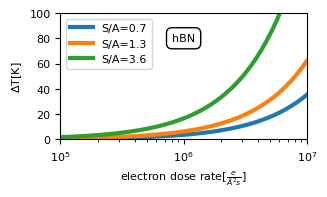

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3.37, 2.08))  # Create a single subplot

for l in [0.3, 0.6, 1.05]:
    ein = 80
    b = calculate_b_values_for_l(l, 3.7e-06,ein=ein)
    ax.plot(np.array(b['{}'.format(ein)])[:,0], np.array(b['{}'.format(ein)])[:,1], linewidth=3, label='S/A={:.1f}'.format(b['s/a']))

ax.set_xscale('log')
ax.spines['bottom'].set_position(('data', 0.0))
ax.set_xlabel(r'electron dose rate[$\frac{e}{\AA^2 s}$]', fontsize=8)
ax.set_ylabel('$\Delta$T[K]', fontsize=8)
# ax.set_ylabel('')
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_ylim([0, 100])
ax.set_xlim([10**5-1, 10**7])
ax.legend(fontsize=8)

# Add the title as a text box inside the plot
title_text = "hBN"
ax.text(0.5, 0.8, title_text, transform=ax.transAxes, ha='center', va='center',
        fontsize=8, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig('deltathbn.pdf', format='pdf',dpi=300)
plt.show()


### Figure 3a

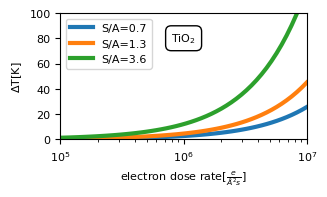

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3.37, 2.08))  # Create a single subplot

for l in [0.3, 0.6, 1.05]:
    ein = 80
    b = calculate_b_values_for_l(l, 5.1e-06,ein=ein)
    ax.plot(np.array(b['{}'.format(ein)])[:,0], np.array(b['{}'.format(ein)])[:,1], linewidth=3, label='S/A={:.1f}'.format(b['s/a']))

ax.set_xscale('log')
ax.spines['bottom'].set_position(('data', 0.0))
ax.set_xlabel(r'electron dose rate[$\frac{e}{\AA^2 s}$]', fontsize=8)
ax.set_ylabel('$\Delta$T[K]', fontsize=8)
# ax.set_ylabel('')
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_ylim([0, 100])
ax.set_xlim([10**5-1, 10**7])
ax.legend(fontsize=8)

# Add the title as a text box inside the plot
title_text = "TiO$_2$"
ax.text(0.5, 0.8, title_text, transform=ax.transAxes, ha='center', va='center',
        fontsize=8, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig('deltattio2.pdf', format='pdf',dpi=300)
plt.show()


### Figure 4b

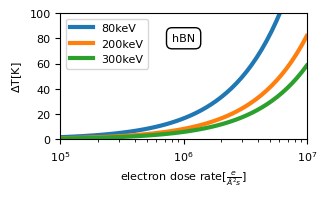

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3.37, 2.08))  # Create a single subplot

for ein in [80, 200, 300]:
    l = 1.05
    b = calculate_b_values_for_l(l, 3.7e-06,ein=ein)
    ax.plot(np.array(b['{}'.format(ein)])[:,0], np.array(b['{}'.format(ein)])[:,1], linewidth=3, label=f"{ein}keV")

ax.set_xscale('log')
ax.spines['bottom'].set_position(('data', 0.0))
ax.set_xlabel(r'electron dose rate[$\frac{e}{\AA^2 s}$]', fontsize=8)
ax.set_ylabel('$\Delta$T[K]', fontsize=8)
# ax.set_ylabel('')
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_ylim([0, 100])
ax.set_xlim([10**5-1, 10**7])
ax.legend(fontsize=8,loc='upper left')

# Add the title as a text box inside the plot
title_text = "hBN"
ax.text(0.5, 0.8, title_text, transform=ax.transAxes, ha='center', va='center',
        fontsize=8, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig('VEINdeltathbn.pdf', format='pdf',dpi=300)
plt.show()


### Figure 4a

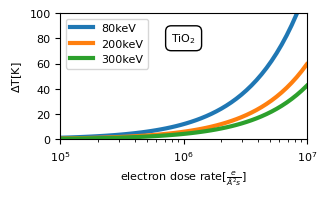

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3.37, 2.08))  # Create a single subplot

for ein in [80, 200, 300]:
    l = 1.05
    b = calculate_b_values_for_l(l, 5.1e-06,ein=ein)
    ax.plot(np.array(b['{}'.format(ein)])[:,0], np.array(b['{}'.format(ein)])[:,1], linewidth=3, label=f"{ein}keV")

ax.set_xscale('log')
ax.spines['bottom'].set_position(('data', 0.0))
ax.set_xlabel(r'electron dose rate[$\frac{e}{\AA^2 s}$]', fontsize=8)
ax.set_ylabel('$\Delta$T[K]', fontsize=8)
# ax.set_ylabel('')
# ax.set_yticklabels([])
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_ylim([0, 100])
ax.set_xlim([10**5-1, 10**7])
ax.legend(fontsize=8,loc='upper left')

# Add the title as a text box inside the plot
title_text = "TiO$_2$"
ax.text(0.5, 0.8, title_text, transform=ax.transAxes, ha='center', va='center',
        fontsize=8, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig('VEINdeltattio2.pdf', format='pdf',dpi=300)
plt.show()


## Nanoparticles colorized by s/a ratio - for figure 3 top row

/tmp/ipykernel_9686/4169024032.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(points[simplex, 0], points[simplex, 1], 'k-',color=color)


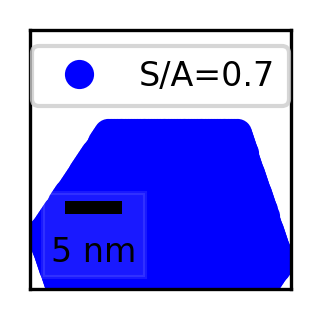

/tmp/ipykernel_9686/4169024032.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(points[simplex, 0], points[simplex, 1], 'k-',color=color)


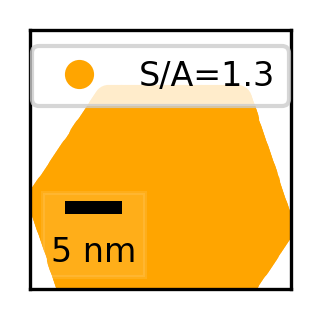

/tmp/ipykernel_9686/4169024032.py:73: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(points[simplex, 0], points[simplex, 1], 'k-',color=color)


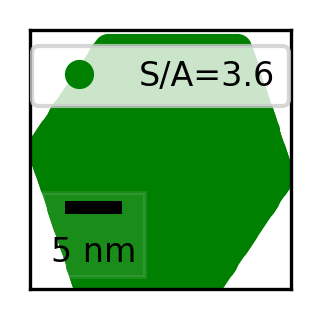

In [7]:
figs=[]
pls=[]
max0=[]
for l in [0.3,0.6,1.05]:
    nanoparticlesize="big"
    surfaces = [(1, 1, 1),(-1,-1,-1),(0,0,1)] # These are the surfaces I will include
    if nanoparticlesize=="small":
        layers=[7,5,8]
    if nanoparticlesize=="medium":
        layers=[9,-2,10]
    if nanoparticlesize=="big":
        layers=[40,int(l*40),int(1.14*40)]

    lc = 4.08000
    np = FaceCenteredCubic('Au', surfaces, layers, latticeconstant=lc)
    np.rotate((1,1,1),(0,0,1))
    np.rotate(v=(0,0,1),a=75,center='COU')
    np.center()

    atoms =  np
    del np
    import numpy as np

    ktio2=5.12e-06 #k value in Angstromns 
    atoms = atoms[atoms.symbols=="Au"]
    nanoparticle_alone=atoms
    hull = ConvexHull(nanoparticle_alone.positions)
    nanoparticleavolume=hull.volume
    import numpy as numpy
    xyp=[]
    for i in nanoparticle_alone.positions:
        xyp.append([i[0],i[2]])
    xyp=numpy.array(xyp)
    xyp=xyp.round(1)
    unique, counts = numpy.unique(xyp, return_counts=True,axis=0)
    average_atomcolumns = counts.mean()*2.88
    hull = ConvexHull(unique)
    nanoparticlecrossarea=hull.volume
    nanoparticle_density = len(nanoparticle_alone)/nanoparticleavolume
    znp  = min(atoms.positions[::,2])
    znp = znp.round(2)
    atomsb=atoms[(atoms.positions[::,2]).round(2)==znp]
    nanoparticlearealen=len(atomsb)
    points=atomsb.positions[:,:2]
    hull = ConvexHull(points)
    nanoparticlearea=hull.volume
    nanoparticle_surface_density = nanoparticlearealen/nanoparticlearea
    figs.append(fig)
    points=unique
    from scipy.spatial import ConvexHull, convex_hull_plot_2d
    hull = ConvexHull(points)
    color_mapping = {0.3: 'blue', 0.6: 'orange', 1.05: 'green'}
    color = color_mapping.get(l, 'blue')     
    import matplotlib.pyplot as plt
    from matplotlib_scalebar.scalebar import ScaleBar
    import matplotlib.cbook as cbook
    points=points/10
    points[:,0]=points[:,0]+abs(np.min(points[:,0]))
    points[:,1]=points[:,1]+abs(np.min(points[:,1]))
#     plt.cla()
    fig = plt.figure(figsize=(3.37/3, 3.37/3))
    plt.plot(points[:,0], points[:,1], 'o',label='S/A={:.1f}'.format(nanoparticlecrossarea/nanoparticlearea),color=color)
    plt.legend(loc='upper center',fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    ax.set_ylabel('')
    ax.set_yticklabels([])
    plt.xticks([])
    # plt.xlim([0, 5])
    # plt.ylim([0,5])
    # plot_atoms(atoms,rotation=('90x,180y,180z'))
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-',color=color)
    scalebar = ScaleBar(1,"nm",location='lower left',sep=None,length_fraction=.4,
                        rotation='horizontal',scale_loc='bottom',
                        font_properties={'size' : 8},width_fraction=0.05,border_pad=0.3,box_alpha=0.1)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylim([-0.6, np.max(points[::,0])])
    plt.xlim([-1, np.max(points[::,0])+1])
    ax.set_ylabel('')
    ax.set_yticklabels([])
    plt.xticks([])
    plt.yticks([])

#     plt.axhline(y = max0, color = 'r', linestyle = '-')
    plt.gca().add_artist(scalebar)
    plt.gcf().set_dpi(300)
    plt.savefig(f'{color}.pdf', format='pdf',dpi=300)
    plt.savefig(f'{color}.png', format='png',dpi=300)
    plt.show()
    
    

## Temperature evolution of nanoparticles and substrate figure 6 (left) & SOI-4

In [8]:
def get_md2(mdruntraj):
    import numpy as np
    trajectory=Trajectory('{}'.format(mdruntraj))
    atoms=trajectory[0]
    atoms = atoms[atoms.symbols=="Au"]
    nanoparticle_alone=atoms
    hull = ConvexHull(nanoparticle_alone.positions)
    nanoparticleavolume=hull.volume
    import numpy as numpy
    xyp=[]
    for i in nanoparticle_alone.positions:
        xyp.append([i[0],i[2]])
    xyp=numpy.array(xyp)
    xyp=xyp.round(1)
    unique, counts = numpy.unique(xyp, return_counts=True,axis=0)
    average_atomcolumns = counts.mean()*2.88
    nanoparticle_density = len(nanoparticle_alone)/nanoparticleavolume

    znp  = min(atoms.positions[::,2])
    znp = znp.round(2)
    atomsb=atoms[(atoms.positions[::,2]).round(2)==znp]
    nanoparticlearealen=len(atomsb)
    points=atomsb.positions[:,:2]
    hull = ConvexHull(points)
    nanoparticlearea=hull.volume
    atoms=trajectory[0]
    atoms = atoms[atoms.symbols=="Au"]
    x=atoms.get_center_of_mass()[1]
    interface=[]
    for atom in atoms:
        if round(atom.position[1])==round(x):
            interface.append(atom.index)
    cosseca=atoms[interface].positions[::,[0,2]]
    hull=ConvexHull(cosseca)
    nanoparticlecrossarea=hull.volume
    nanoparticle_surface_density = nanoparticlearealen/nanoparticlearea
    if 'smalloxygen' in mdruntraj:
        heatcapacity = 0.00029668112403380886
        title = 'NPsmall'
    elif 'mediumoxygen' in mdruntraj:
        heatcapacity = 0.0002858963401825095
        title = 'NPmedium'
    elif 'bigoxygen' in mdruntraj:
        heatcapacity = 0.00028302340367328445
        title = 'NPbig'
    elif 'superbigoxygen' in mdruntraj:
        heatcapacity = 0.00028002340367328445
        title = 'NPsuperbig'
        
    else:
        raise ValueError(f"Unknown trajectory file name: {mdruntraj}")
        
    if 'substraterutile' in mdruntraj:
        substrate_used='rutile'
    
    elif 'substrateanatase' in mdruntraj:
        substrate_used='anatase'

    elif 'substratehbn' in mdruntraj:
        substrate_used='hBN'
    heatcapacitypervolumen = heatcapacity*nanoparticle_density  #eV/A^3*K
    nptemp=[]
    substemp = []
    i=0
    k=0
    vtu=len(trajectory[210:])
    for j in range(len(trajectory[210:])):
        atoms=trajectory[210+j]
        tnp0 = atoms[atoms.symbols=="Au"].get_temperature()
        sizenp=len(atoms[atoms.symbols=="Au"])
        tsubs0 = atoms[~np.array(atoms.symbols =="Au")].get_temperature()
        atoms=trajectory[210+j]
        tnp1 = atoms[atoms.symbols=="Au"].get_temperature()
        tsubs1 = atoms[~np.array(atoms.symbols =="Au")].get_temperature()
        tnp=(tnp0+tnp1)/2
        tsubs=(tsubs0+tsubs1)/2
        nptemp.append(tnp)
        substemp.append(tsubs)
        tavenp=np.mean(nptemp[-30:])
        tavesubs=np.mean(substemp[-30:])
        i+=1
        if round(tavenp)<(420) and k==0:
            print(i,"termalize after:fs",i*100)
            vtu=i
            k=1
    vit=np.mean(nptemp[0:30])-np.mean(substemp[0:30])
    delta_T= (-np.array(substemp)+np.array(nptemp))[::10]
    xdata=np.linspace(0,200,num=2000)
    print(vtu)
    npconstant=nanoparticleavolume*heatcapacitypervolumen/nanoparticlearea
    ydata=(np.array(nptemp)-np.array(substemp))[0:int(vtu)]
    xdata=np.linspace(0,len(ydata)/10,num=len(ydata))
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
    if len(ydata)>0:
        def Gauss(x,A,B):
            y = vit*np.exp(-B*x)
            return y
        parameters, covariance = curve_fit(Gauss, xdata, ydata)
        fit_A = parameters[0]
        fit_B = parameters[1]
        xdata=np.linspace(0,200,num=2000)
#             print(fit_A,fit_B)
        fit_y = Gauss(xdata[::10], fit_A,fit_B)
#         plt.plot(xdata, ydata, 'o', label='data')
    nptemp=np.array(nptemp)[::10]
    substemp=substemp[::10]
#    plt.show()
    # Ensure that all arrays have the same length by padding with NaN
    max_len = max(len(xdata), len(delta_T), len(nptemp), len(substemp), len(fit_y))
    xdata = np.pad(xdata, (0, max_len - len(xdata)), mode='constant', constant_values=np.nan)
    delta_T = np.pad(delta_T, (0, max_len - len(delta_T)), mode='constant', constant_values=np.nan)
    nptemp = np.pad(nptemp, (0, max_len - len(nptemp)), mode='constant', constant_values=np.nan)
    substemp = np.pad(substemp, (0, max_len - len(substemp)), mode='constant', constant_values=np.nan)
    fit_y = np.pad(fit_y, (0, max_len - len(fit_y)), mode='constant', constant_values=np.nan)

    return delta_T, nptemp, substemp, fit_y


1178 termalize after:fs 117800
1178


/home/modules/software/SciPy-bundle/2023.07-gfbf-2023a/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


1967


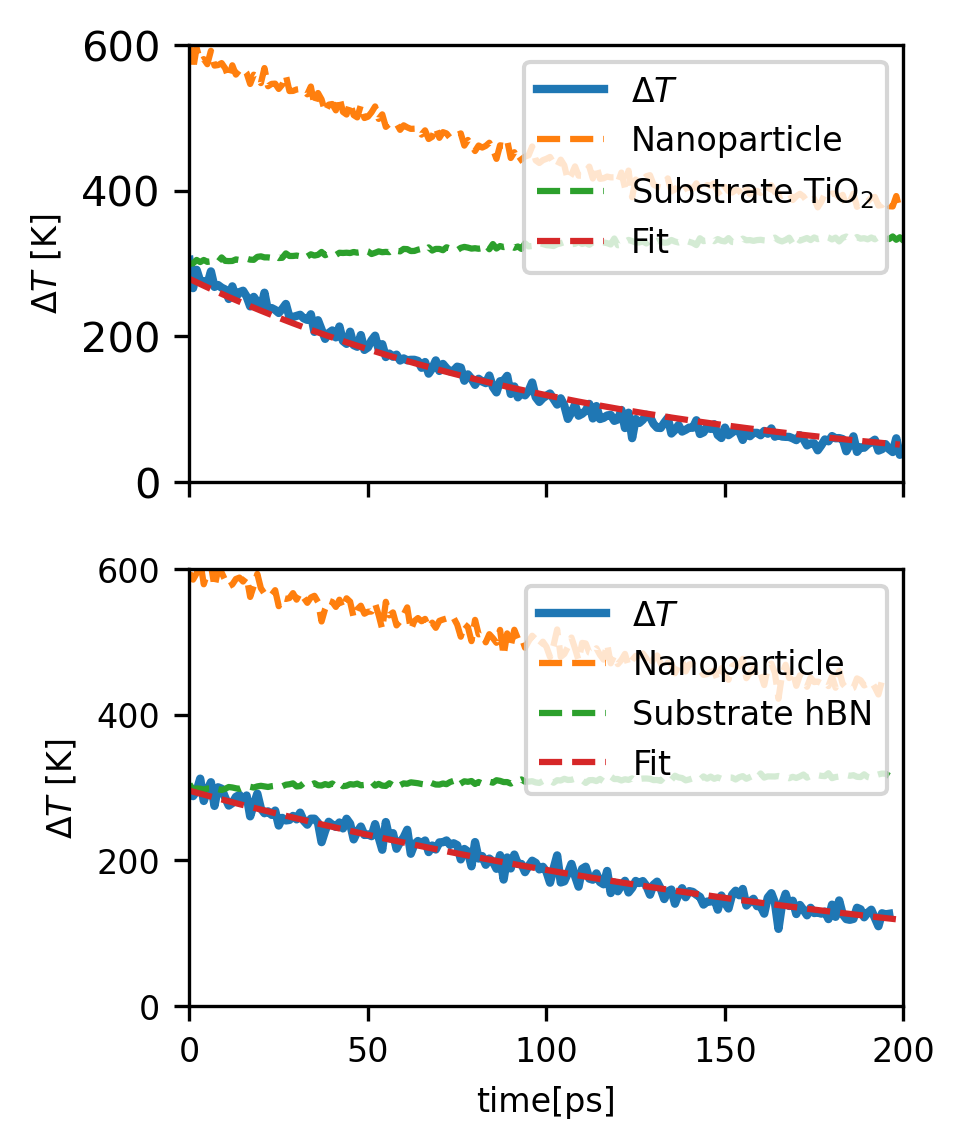

In [9]:
import matplotlib.pyplot as plt

# Assuming A4 paper size with a figure width of half the page width
figure_width = 0.5 * 8.27  # Inches

# Maintain the aspect ratio (adjust height accordingly)
figure_height = figure_width * 1.6*(6 / 8)  # Adjust based on your preferred aspect ratio

def plot_multiple_md2(file_paths):
    num_plots = len(file_paths)
    fig, axs = plt.subplots(num_plots, 1, figsize=(3.37, 2*2.08), sharex=True)

    for i, file_path in enumerate(file_paths):
        if i == 0:
            subs = 'TiO$_2$'
        if i == 1:
            subs = 'hBN'
            
        delta_T, nptemp, substemp, fit_y = get_md2(file_path)

        # Plot delta_T in the lower plot
        axs[i].plot(delta_T, label=f"$\Delta T$", linewidth=2)

        # Plot Nanoparticle and Substrate temperatures in the lower plot
        axs[i].plot(nptemp, label=f'Nanoparticle', linestyle='--')
        axs[i].plot(substemp, label=f'Substrate {subs}', linestyle='--')
        
        # Plot the fit curve in the lower plot
        axs[i].plot(fit_y, label=f'Fit', linestyle='--')
        axs[i].set_xlabel('')
        axs[i].set_ylabel('$\Delta T$ [K]',fontsize=8)
        axs[1].set_xlabel('time[ps]',fontsize=8)
        axs[i].legend(loc='upper right',fontsize=8)
        axs[i].set_xlim(0, 200)
        axs[i].set_ylim(0, 600)

    # Adjust spacing
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    # Save the figure as a PDF
    plt.gcf().set_dpi(300)
    plt.savefig('MDs_fit_hbnTiO2.pdf', format='pdf',dpi=300, bbox_inches='tight')

file_paths = [
    'trajectories_mainpaper/substrateanatase_nanoparticlesuperbigoxygen.traj',
    'trajectories_mainpaper/substratehbn_nanoparticle111bigoxygen.traj'
]

plot_multiple_md2(file_paths)


269 termalize after:fs 26900
269


/home/modules/software/SciPy-bundle/2023.07-gfbf-2023a/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


470 termalize after:fs 47000
470
1078 termalize after:fs 107800
1078


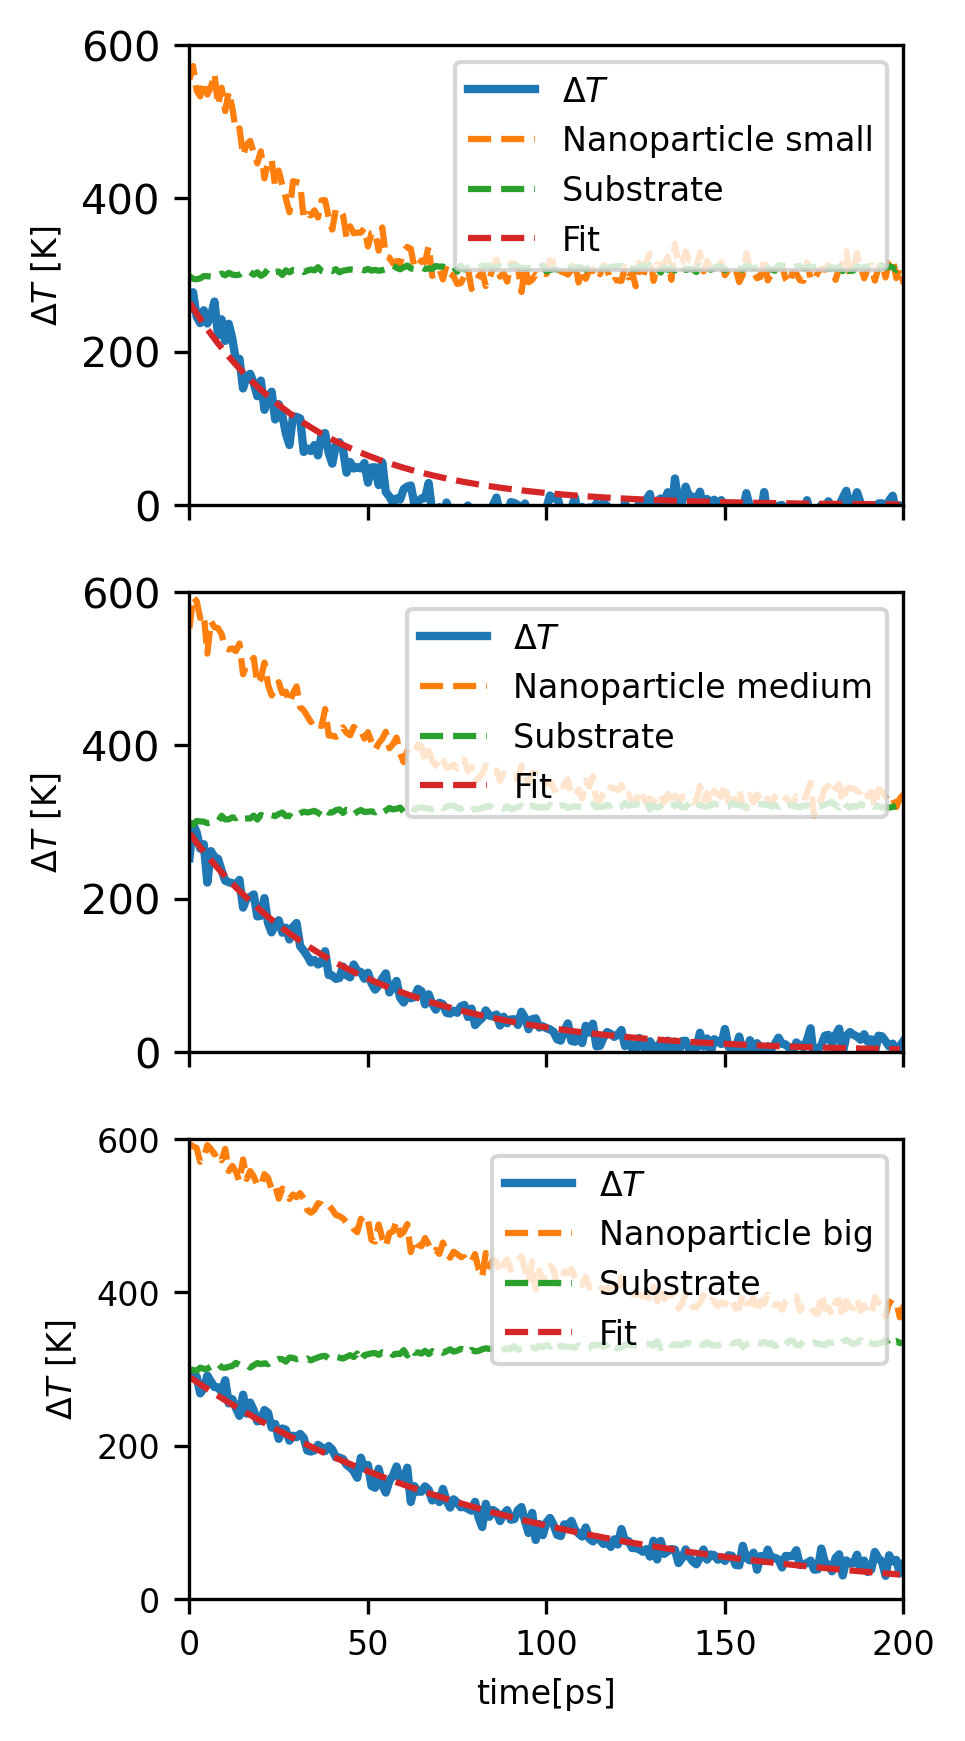

In [10]:
import matplotlib.pyplot as plt

# Assuming A4 paper size with a figure width of half the page width
figure_width = 0.5 * 8.27  # Inches

# Maintain the aspect ratio (adjust height accordingly)
figure_height = figure_width * 1.6*(6 / 8)  # Adjust based on your preferred aspect ratio

def plot_multiple_md2(file_paths):
    num_plots = len(file_paths)
    fig, axs = plt.subplots(num_plots, 1, figsize=(3.37, 3*2.08), sharex=True)

    for i, file_path in enumerate(file_paths):
        if i == 0:
            subs = 'small'
        if i == 1:
            subs = 'medium'
        if i == 2:
            subs = 'big'
            
        delta_T, nptemp, substemp, fit_y = get_md2(file_path)

        # Plot delta_T in the lower plot
        axs[i].plot(delta_T, label=f"$\Delta T$", linewidth=2)

        # Plot Nanoparticle and Substrate temperatures in the lower plot
        axs[i].plot(nptemp, label=f'Nanoparticle {subs}', linestyle='--')
        axs[i].plot(substemp, label=f'Substrate ', linestyle='--')
        
        # Plot the fit curve in the lower plot
        axs[i].plot(fit_y, label=f'Fit', linestyle='--')
        axs[i].set_xlabel('')
        axs[i].set_ylabel('$\Delta T$ [K]',fontsize=8)
        axs[2].set_xlabel('time[ps]',fontsize=8)
        axs[i].legend(loc='upper right',fontsize=8)
        axs[i].set_xlim(0, 200)
        axs[i].set_ylim(0, 600)

    # Adjust spacing
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    # Save the figure as a PDF
    plt.gcf().set_dpi(300)
    plt.savefig('MDs_fit_smallmediumbig.pdf', format='pdf',dpi=300, bbox_inches='tight')

file_paths = ['trajectories_supplementary/substraterutile_nanoparticlesmalloxygen.traj',
'trajectories_supplementary/substraterutile_nanoparticlemediumoxygen.traj',
'trajectories_supplementary/substraterutile_nanoparticlebigoxygen.traj']

plot_multiple_md2(file_paths)


## Figure 1: 2D histogram plot of the error in the forces as a function of

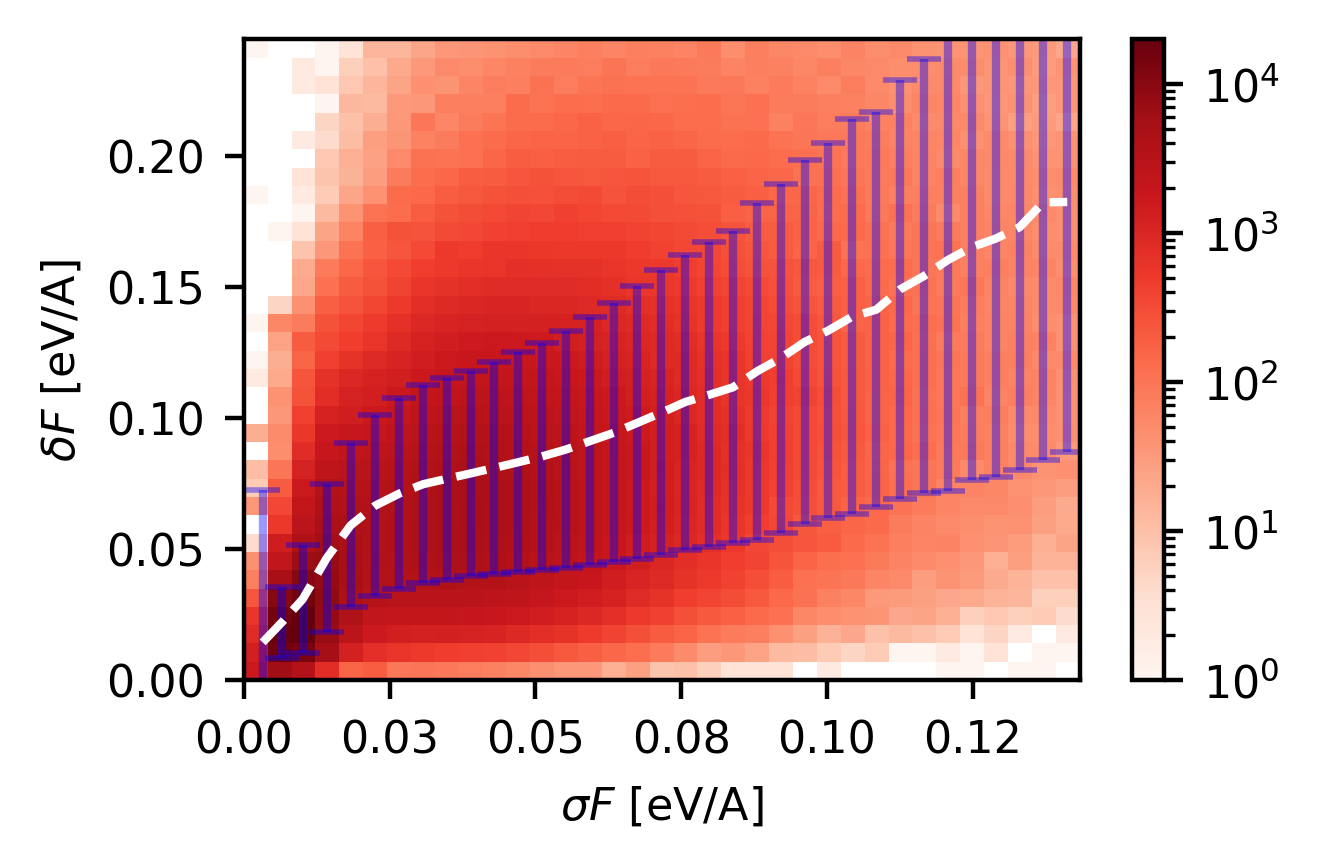

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import StrMethodFormatter

# Set the font size for all text elements to 8
plt.rcParams['font.size'] = 8

def get_data_plot(gpawtraj,nequiptraj):
    trajnequip=Trajectory('{}'.format(nequiptraj))
    trajectory=Trajectory('{}'.format(gpawtraj))
    rmse=[]
    localerror=[]
    for atomsnequip,atomspaw in zip(trajnequip,trajectory):
        fgpaw=atomspaw.get_forces()
        fnequip=atomsnequip.get_forces()
        fdif = fgpaw-fnequip
        error = np.linalg.norm(fdif,axis=1)
        localerror.append(np.sqrt(np.mean(error)))
        rmsv=atomsnequip.get_potential_energies()
        combined_array=np.column_stack((rmsv,error))
        rmse.append(combined_array)
    return np.concatenate(rmse)


A = get_data_plot('trajectories_mainpaper/updated_ts.traj',
                  'trajectories_mainpaper/unc_run8.traj')

# Load data
ferror = A
data=ferror
# Calculate average and standard deviation of the data
average = np.mean(ferror, axis=0)
std = np.std(ferror, axis=0)
r = [[0, average[0] + 3 * std[0]], [0, average[1] + 3 * std[1]]]

# Filter data between the average and 3 standard deviations
filtered_data = ferror[(ferror[:, 0] < r[0][1]) & (ferror[:, 1] < 1 * r[1][1])]

# Create 2D histogram using specified number of bins
bins = 35
histogram, xedges, yedges = np.histogram2d(filtered_data[:, 0], filtered_data[:, 1], bins=bins)

stds = []
expected_values = []
x_values = []
for i in range(len(xedges) - 1):
    x = (xedges[i] + xedges[i + 1]) / 2
    bin_data = data[(data[:, 0] >= xedges[i]) & (data[:, 0] < xedges[i + 1])]
    if len(bin_data) > 0:
        x_avg=np.mean(bin_data[:,0])
        y_avg=np.mean(bin_data[:,1])
        expected_values.append(y_avg)
        x_values.append(x_avg)
        stds.append(np.std(bin_data[:,1]))
stds = np.array(stds)              
x_values = np.array(x_values)
expected_values=np.array(expected_values)
# Plot the 2D histogram with error bars
plt.figure(figsize=(3.37, 2.08))  # Set the figsize to (3.37, 2.08)
plt.hist2d(filtered_data[:, 0], filtered_data[:, 1], bins=bins, range=r, cmap='Reds', norm=colors.LogNorm())
plt.ylabel("$\delta F$ [eV/A]", fontsize=8)  # Set the font size to 8
plt.xlabel("$\sigma F$ [eV/A]", fontsize=8)  # Set the font size to 8
plt.colorbar()
# Set x-axis and y-axis labels to show just 2 decimals
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))

#plot the avg values and errorbar
plt.errorbar(x_values, expected_values, yerr=stds, fmt='none', capsize=3, color='blue', alpha=0.4)
plt.plot(x_values, expected_values, '--', color='white')
plt.xticks(fontsize=8)  # Set the font size to 8
plt.yticks(fontsize=8)  # Set the font size to 8
plt.gcf().set_dpi(400)
plt.savefig('Error_vs_variance.pdf', format='pdf', dpi=600, bbox_inches='tight')

plt.show()


# Figure 2: Where does the network struggle to predict the forces?

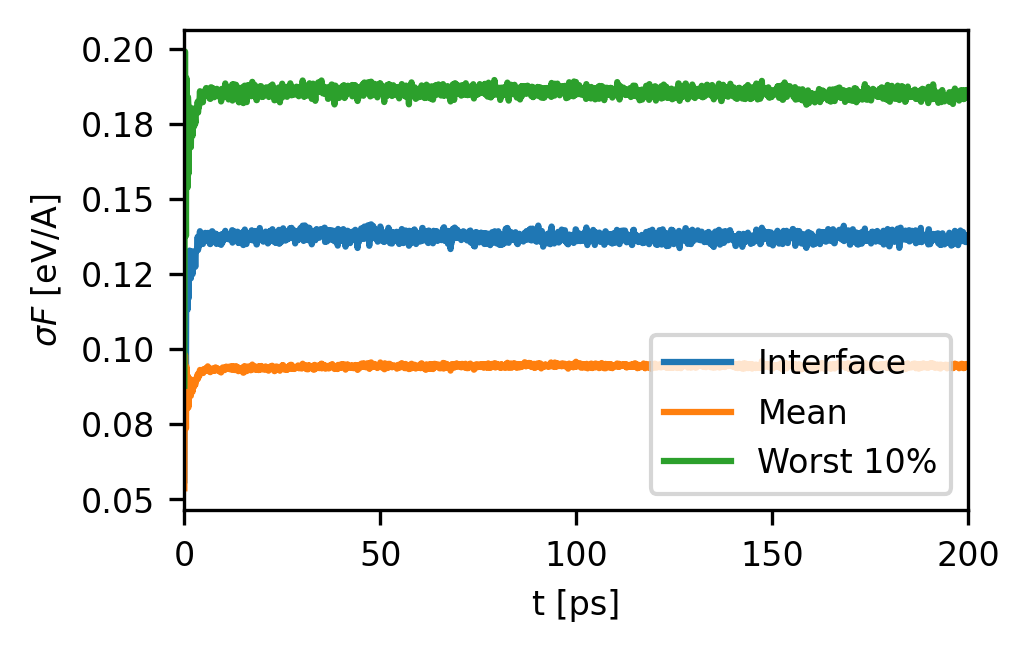

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import Trajectory
from matplotlib.ticker import StrMethodFormatter

traj = Trajectory('trajectories_mainpaper/unc_run8_big.traj')
atoms = traj[0]
interface = (19.2 < atoms.positions[:, 2]) & (23.1 > atoms.positions[:, 2])
a = []
for atoms in traj:
    my_numpy_array = atoms.get_potential_energies()
    mean = np.mean(atoms.get_potential_energies())
    attheinterface = np.mean(atoms.get_potential_energies()[interface])
    average_largest_10_percent = np.mean(np.sort(my_numpy_array)[-int(len(my_numpy_array) * 0.1):])
    a.append([mean, attheinterface, average_largest_10_percent])
a = np.array(a)

# Set the figsize to (3.37, 2.08) and font size to 8
fig = plt.figure(figsize=(3.37, 2.08))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('t [ps]', fontsize=8)  # Set the font size to 8
plt.ylabel("$\sigma F$ [eV/A]", fontsize=8)  # Set the font size to 8
plt.plot(np.linspace(0, 200, len(a[:, 1])), a[:, 1], label='Interface')
plt.plot(np.linspace(0, 200, len(a[:, 1])), a[:, 0], label='Mean')
plt.plot(np.linspace(0, 200, len(a[:, 1])), a[:, 2], label='Worst 10%')
plt.legend(loc='lower right', fontsize=8, markerscale=1)
# Set x-axis and y-axis labels to show just 2 decimals
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim([0, 200])
plt.gcf().set_dpi(300)
plt.savefig('interfacevariance.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


# Figure SOI-3: importance of big forces in the training set

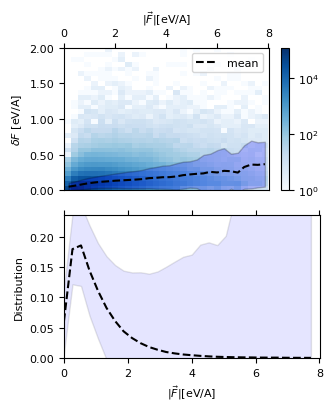

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import Trajectory
from matplotlib import colors
from matplotlib.ticker import FormatStrFormatter

import numpy as np
import matplotlib.pyplot as plt
from ase.io import Trajectory
from matplotlib import colors

def create_data(trajnequip_file, trajgpaw_file):
    trajnequip = Trajectory(trajnequip_file)
    trajgpaw = Trajectory(trajgpaw_file)
    data = []
    for atomsnequip, atomspaw in zip(trajnequip, trajgpaw):
        fpaw = atomspaw.get_forces()
        fneq = atomsnequip.get_forces()
        deltaf = np.linalg.norm(fpaw - fneq, axis=1)
        fnorm = np.linalg.norm(fpaw, axis=1)
        new_data = np.column_stack((fnorm, deltaf))
        data.extend(new_data)
    return np.array(data)

def plot_histogram_with_error_bars(data,name,bins=30):
    rmse=np.sqrt(np.sum(data[:,1]**2)/len(data[:,1]))
    average = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    r = [[0, 8], [0, average[1]+5*std[1]]]  # Adjust the range as needed
    r = [[0, 8], [0, 2]]  # Adjust the range as needed
    histogram, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], bins=bins, range=r)
    stds = []
    expected_values = []
    x_values = []

    for i in range(len(xedges) - 1):
        x = (xedges[i] + xedges[i + 1]) / 2
        bin_data = data[(data[:, 0] >= xedges[i]) & (data[:, 0] < xedges[i + 1])]
        
        if len(bin_data) > 0:
            x_avg=np.mean(bin_data[:,0])
            y_avg=np.mean(bin_data[:,1])
            expected_values.append(y_avg)
            x_values.append(x_avg)
            stds.append(np.std(bin_data[:,1]))
    stds = np.array(stds)              
    
    # Create a figure with two subplots that share the same x-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.37, 2*2.08), sharex=True)

    # Plot the first subplot (top)
    ax1.set_ylabel("$\delta F$ [eV/A]", fontsize=8)
    ax1.set_xlabel(r"|$\vec{F}$|[eV/A]", fontsize=8)
    ax1.xaxis.set_label_position('top') 
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax1.tick_params(axis='both', labelsize=8)
    ax1.hist2d(data[:, 0], data[:, 1], bins=bins, range=r,norm=colors.LogNorm(),cmap='Blues')
    h = ax1.hist2d(data[:, 0], data[:, 1], bins=bins, range=r, cmap='Blues',norm=colors.LogNorm())
    ax1.fill_between(x_values, expected_values + stds, expected_values - stds, alpha=0.23, edgecolor='black', facecolor='blue')
    if name=='5':
        ax1.hist2d(data[:, 0], data[:, 1], bins=bins, range=r,norm=colors.LogNorm(),cmap='Reds')
        h = ax1.hist2d(data[:, 0], data[:, 1], bins=bins, range=r, cmap='Reds',norm=colors.LogNorm())
        ax1.fill_between(x_values, expected_values + stds, expected_values - stds, alpha=0.23, edgecolor='black', facecolor='orange')
    ax1.plot(x_values, expected_values, 'k--', label='mean')
    
    ax1.legend(fontsize=8)
    ax1.grid(False)
    # Add a colorbar to the right of the top subplot
    cbar = plt.colorbar(h[3], ax=ax1)  # h[3] corresponds to the QuadMesh in the 2D histogram

    # Plot the second subplot (bottom)
    ax2.set_ylabel("Distribution", fontsize=8)
    prob_dist = histogram / np.sum(histogram)
    p_y_given_x = np.sum(prob_dist, axis=1)
    if name=='5':
        ax2.axvline(5, color='orange')
        ax2.fill_between(xedges[:-1], p_y_given_x + stds, p_y_given_x - stds, alpha=0.1, edgecolor='orange', facecolor='orange')
    ax2.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True)
    ax2.fill_between(xedges[:-1], p_y_given_x + stds, p_y_given_x - stds, alpha=0.1, edgecolor='black', facecolor='blue')
    ax2.plot(xedges[:-1], p_y_given_x, '--', color='black')
    ax2.set_ylim([0, max(p_y_given_x) + 0.05])
    ax2.set_xlim([0, 8 + 0.01])
    ax2.tick_params(axis='both', labelsize=8)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#     ax2.set_aspect('auto')  # Ensure the same aspect ratio for both subplots

    # Add common x-label
    plt.xlabel(r"|$\vec{F}$|[eV/A]", fontsize=8)

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.savefig(f'{name}_style_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')

    # Show the plot
    
    plt.show()
    return x_values, expected_values, stds

trajnequip_file = 'trajectories_supplementary/data_set_with_pot_dts02.traj'
trajgpaw_file = 'trajectories_supplementary/updated_ts.traj'

data = create_data(trajnequip_file, trajgpaw_file)
fx,fy,fstd=plot_histogram_with_error_bars(data,"full")


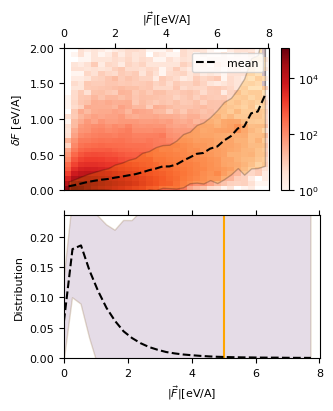

In [14]:
trajnequip_file = 'trajectories_supplementary/data_set_with_potential_lowf.traj'
trajgpaw_file = 'trajectories_supplementary/updated_ts.traj'
data = create_data(trajnequip_file, trajgpaw_file)
ix,iy,istd=plot_histogram_with_error_bars(data,"5")


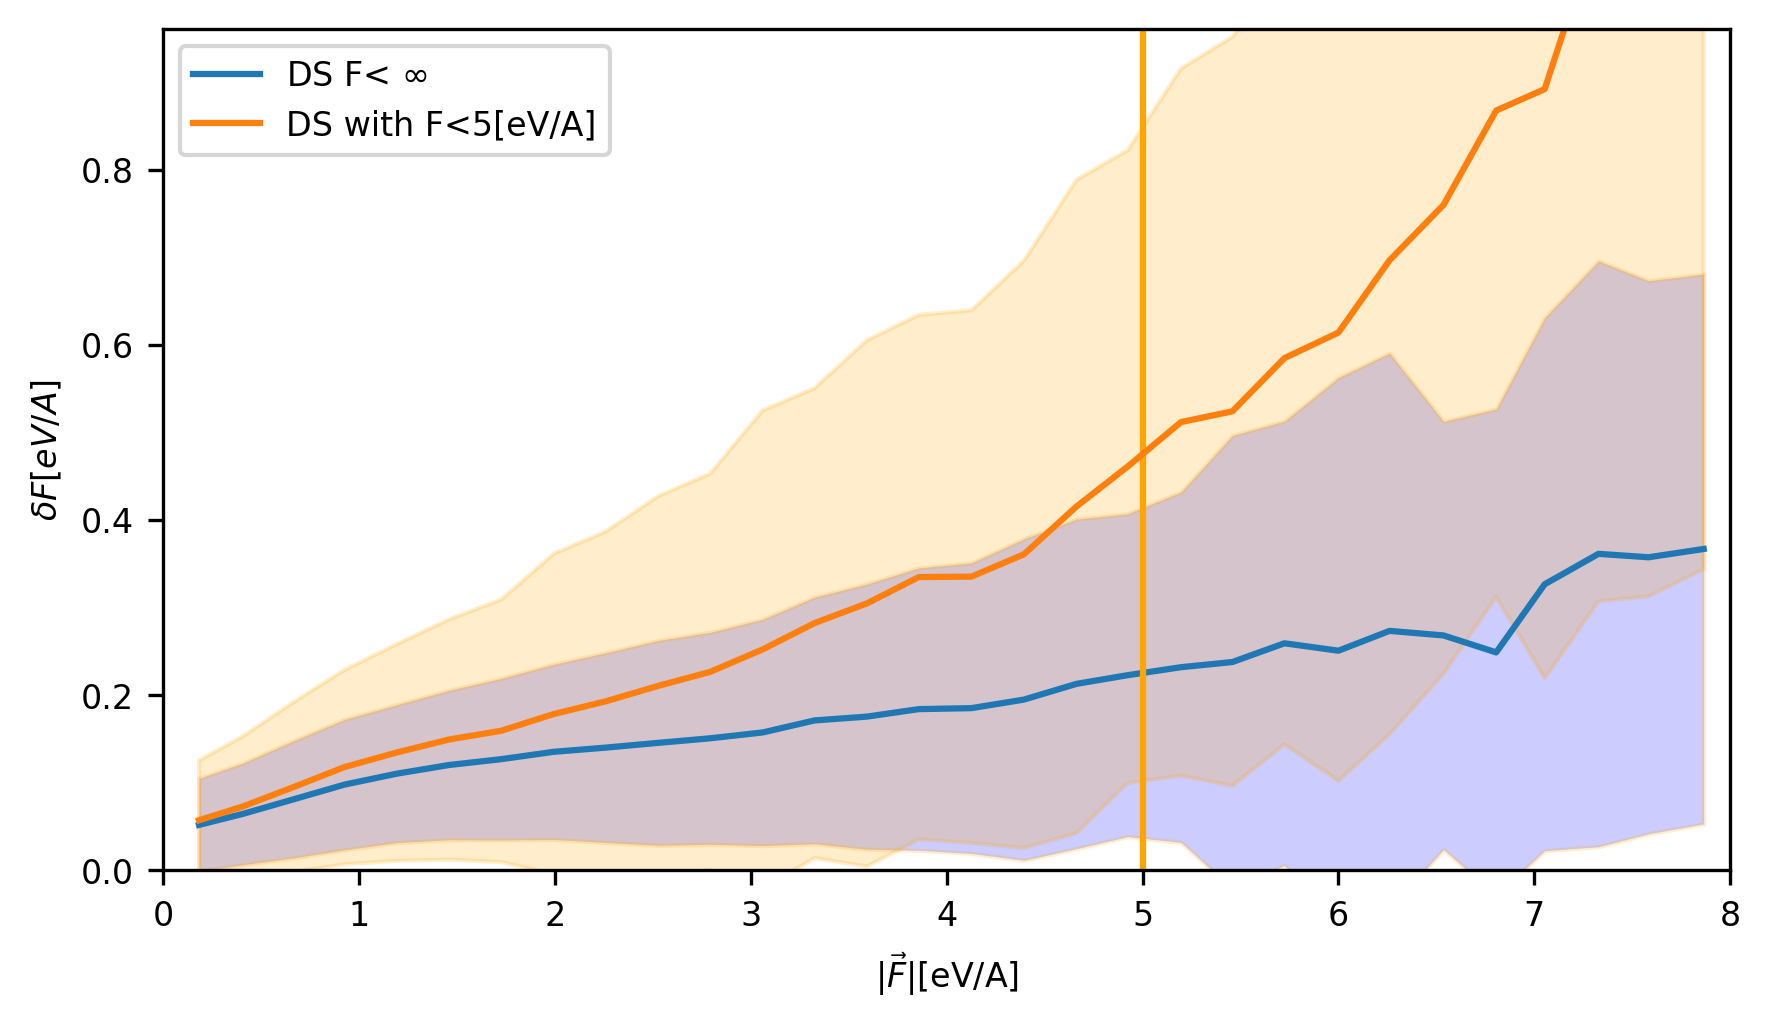

In [15]:
fig,ax= plt.subplots(figsize=(2*3.37, 1.75*2.08))
plt.plot(fx,fy,label='DS F< $\infty$')
# plt.errorbar(curveall[:,0],curveall[:,1],sigmasall,color='b',elinewidth=3)
plt.axvline(5, color = 'orange')
plt.fill_between(fx,fy+fstd, fy-fstd,
    alpha=0.2, edgecolor='orange', facecolor='blue')
plt.plot(ix,iy,label='DS with F<5[eV/A]')
# plt.errorbar(curvelow[:,0],curvelow[:,1],sigmaslow,color='orange',ls='--',elinewidth=1)
plt.fill_between(ix,iy+istd, iy-istd,
    alpha=0.2, edgecolor='orange', facecolor='orange')
plt.ylabel("$\delta F[eV/A]$",fontsize=8)
plt.xlabel(r"|$\vec{F}$|[eV/A]",fontsize=8)
# plt.axvline(2,color = 'black')
ax.set_xlim([0,8])
ax.set_ylim([0,0.96])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.gcf().set_dpi(300)
plt.savefig(f'importanceofforces.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Figure 5: Calibration of the network (Figure 5 bottom, Figure SOI-1, Figure 5 top)

/tmp/ipykernel_9686/1343809723.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])


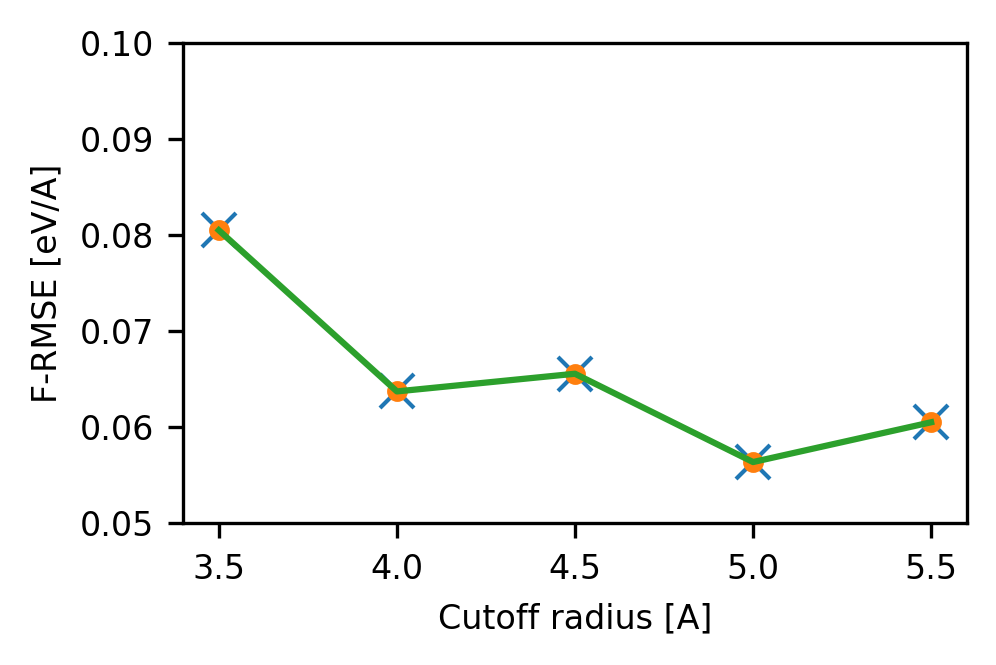

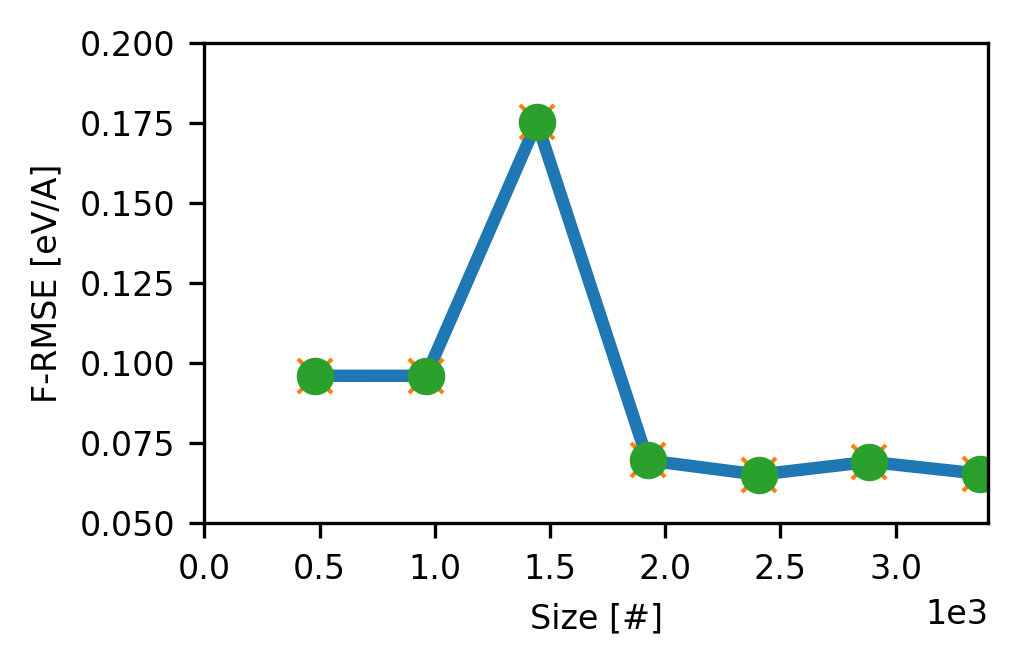

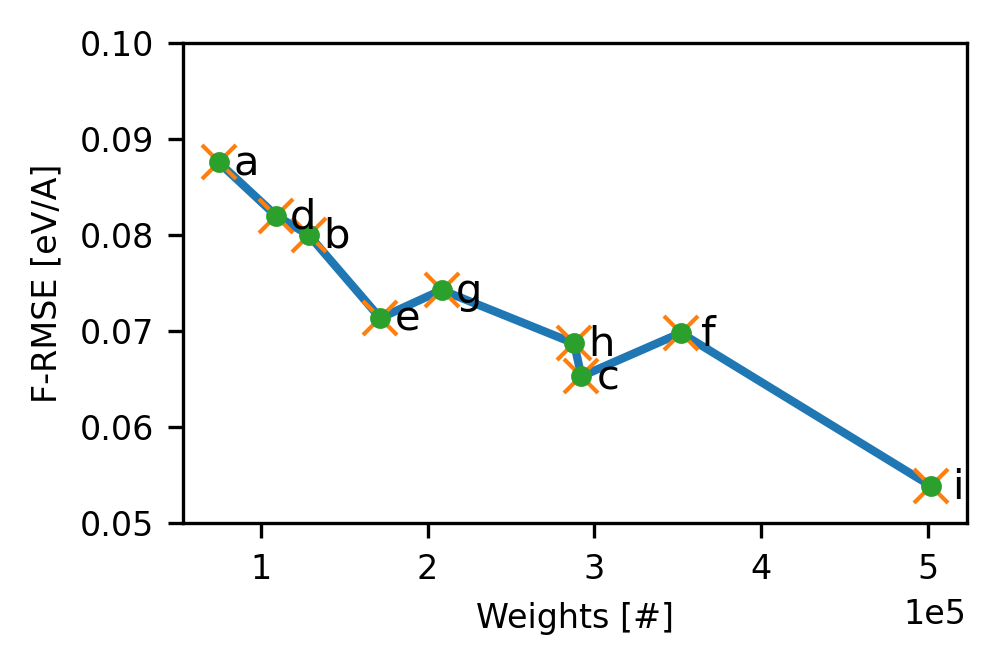

In [16]:
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
cr=np.array([[5.5, 0.0605],[5, 0.05636],[4.5, 0.06555],[4, 0.06371],[3.5, 0.08048]])

wa= np.array([[0.1, 0.096],[0.2, 0.09601],[0.3, 0.1752],[0.4, 0.0696],[0.5, 0.06513],[0.6, 0.06917],[0.7, 0.0654]])
data = np.array([[74872, 0.08754],
                 [109176, 0.082],
                 [128888, 0.07997],
                 [208504, 0.07426],
                 [171640, 0.07134],
                 [351864, 0.0698],
                 [287864, 0.06871],
                 [292216, 0.06528],
                 [501880, 0.05386]])
data = data[data[:, 0].argsort()]
# Set the font size for all text elements to 10
ml.rcParams['font.size'] = 8

%matplotlib inline

# Plot 1
fig = plt.figure(figsize=(1 * 3.37, 1 * 2.08))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Cutoff radius [A]', fontsize=8)
plt.ylabel('F-RMSE [eV/A]', fontsize=8)
plt.plot(cr[:,0],cr[::,1],'x',markersize=8)
plt.plot(cr[:,0],cr[::,1],'o',markersize=4)
plt.plot(cr[:,0],cr[::,1])
plt.ylim([0.05,0.1])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])
plt.gcf().set_dpi(300)

plt.savefig(f'cutoffvsrmse.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2
fig = plt.figure(figsize=(1 * 3.37, 1 * 2.08))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Size [#]', fontsize=8)
plt.ylabel('F-RMSE [eV/A]', fontsize=8)
plt.plot(wa[:,0]*4810.0,wa[::,1],linewidth=3)
plt.plot(wa[:,0]*4810.0,wa[::,1],'x',markersize=8)
plt.plot(wa[:,0]*4810.0,wa[::,1],'o',markersize=8)
plt.ylim([0.05,0.2])
plt.gcf().set_dpi(300)
#f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
#g = lambda x, pos: "${}$".format(f._formatSciNotation('%1.10e' % x))
#plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gcf().set_dpi(300)
plt.xlim([0,1.01*np.max(wa[:,0]*4810.0)])

plt.savefig(f'sizevsrmse.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3
fig = plt.figure(figsize=(1 * 3.37, 1 * 2.08))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Weights [#]', fontsize=8)
plt.ylabel('F-RMSE [eV/A]', fontsize=8)
plt.plot(data[:, 0], data[:, 1], linewidth=2)
plt.plot(data[:, 0], data[:, 1], 'x', markersize=8)
plt.plot(data[:, 0], data[:, 1], 'o', markersize=4)
plt.ylim([0.05,0.1])
ax = plt.gca()

# Label the points
labels = ['a', 'd', 'b', 'e', 'g', 'h', 'c', 'f', 'i']
for i, label in enumerate(labels[::1]):
    ax.annotate(label, (data[i, 0], data[i, 1]), textcoords="offset points", xytext=(6.5, -3), ha='center', fontsize=10)

#f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
#g = lambda x, pos: "${}$".format(f._formatSciNotation('%1.10e' % x))
#plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gcf().set_dpi(300)
plt.savefig(f'weightsvsrmse.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()


# Plot of temperature distribution.  Figure 6

This produces two ASE .traj files that can be viewed with ASE to generate the plots in figure 6.

In [17]:
trajcg=Trajectory("trajectories_mainpaper/substraterutile_nanoparticlesuperbigoxygen.traj")

atoms=trajcg[0] #taking initial config
hotatoms=[] #list of the indices of atoms
for i in atoms:
    index=i.index
    hotatoms.append(index)
slices=list(set(atoms[hotatoms].positions[:,2].astype(int))) #sort the atoms by z-position that way we make slices of atoms
indicesofslices=[]
for i in slices:
    a=[]
    for atom in atoms:
        if (atom.position[2].astype(int))==i:
            a.append(atom.index)
    indicesofslices.append(a)

traj=Trajectory("NP_Heating_evolution_anatase.traj", "w", atoms)
for atoms in trajcg[210::100]: #Verlet dyn starts always at 210
    newtags=atoms.get_tags()
    for i in indicesofslices:
        temp=atoms[i].get_temperature()
        tag=int(temp) #tags of atoms are the temperature of that slide 
        newtags[i]=tag
    atoms.set_tags(newtags)
#     print(atoms[atoms.symbols=='Au'].get_temperature())
    traj.write(atoms)
    
    
trajcg=Trajectory('trajectories_mainpaper/substratehbn_nanoparticle111superbigoxygen.traj')
atoms=trajcg[0] #taking initial config
hotatoms=[] #list of the indices of atoms
for i in atoms:
    index=i.index
    hotatoms.append(index)
slices=list(set(atoms[hotatoms].positions[:,2].astype(int))) #sort the atoms by z-position that way we make slices of atoms
indicesofslices=[]
for i in slices:
    a=[]
    for atom in atoms:
        if (atom.position[2].astype(int))==i:
            a.append(atom.index)
    indicesofslices.append(a)

traj=Trajectory("NP_Heating_evolution_hbn.traj", "w", atoms)
for atoms in trajcg[210::100]: #Verlet dyn starts always at 210
    hotatoms=[] #list of the indices of atoms
    for i in atoms:
        index=i.index
        hotatoms.append(index)
    slices=list(set(atoms[hotatoms].positions[:,2].astype(int))) #sort the atoms by z-position that way we make slices of atoms
    indicesofslices=[]
    for i in slices:
        a=[]
        for atom in atoms:
            if (atom.position[2].astype(int))==i:
                a.append(atom.index)
        indicesofslices.append(a)
    newtags=atoms.get_tags()
    for i in indicesofslices:
        temp=atoms[i].get_temperature()
        tag=int(temp) #tags of atoms are the temperature of that slide 
        newtags[i]=tag
    atoms.set_tags(newtags)
#     print(atoms[atoms.symbols=='Au'].get_temperature())
    traj.write(atoms)    

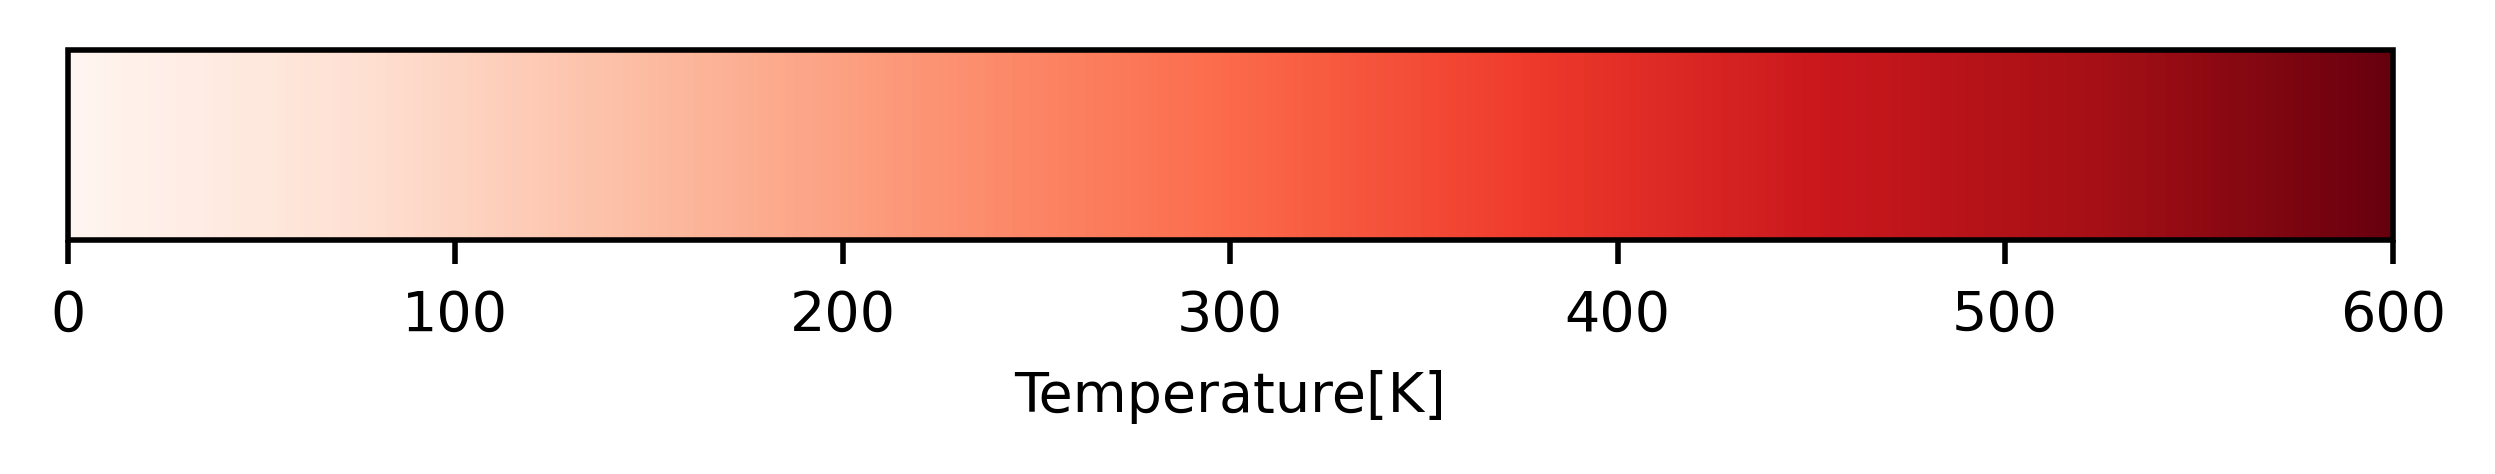

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

norm = mpl.colors.Normalize(vmin=0, vmax=600)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
             cax=ax, orientation='horizontal', label='Temperature[K]')
plt.gcf().set_dpi(500)


# EELS plots

In [19]:
%matplotlib inline
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
def integrate(x, y):
    """
    Numerically integrate y over the range x using the trapezoidal rule.
    x: array of x values
    y: array of y values corresponding to x
    returns: the approximate integral of y over x
    """
    # Calculate the width of each trapezoid
    dx = x[1] - x[0]

    # Sum the areas of the trapezoids
    area = dx * (y[0]/2 + sum(y[1:-1]) + y[-1]/2)

    return area
def expected_value(x, y):
    """
    Calculate the expected value of y(x) given x and y arrays.
    x: array of x values
    y: array of y values corresponding to x
    returns: the expected value of y(x)
    """
    # Calculate the probability density function
    pdf = y / np.sum(y)

    # Calculate the expected value
    expected = np.sum(x * pdf)

    return expected

In [20]:

from matplotlib.ticker import FormatStrFormatter

# Function to calculate lambda (nanoparticle size parameter)
def calculate_lambda(file_path, start, end,cap):
    # Load the hyperspectral dataset
    s = hs.load(file_path)
    # Set the signal type to Electron Energy Loss Spectroscopy (EELS)
    s.set_signal_type("EELS")
    # Align the zero-loss peak of the spectrum
    s.align_zero_loss_peak()
    # Estimate the energy range of the elastic scattering threshold (Zero Loss Peak)
    ths = s.estimate_elastic_scattering_threshold().data
    # Get the signal data with the Zero Loss Peak
    szlp = s.data
    # Get the energy and position axes
    x2 = s.axes_manager[1].axis
    x = s.axes_manager[0].axis
    ratio = []

    # Loop through the spectra in the dataset
    for i in range(len(szlp)):
        emin = ths[i]  # Minimum value of energy to consider in the EELS spectrum
        maskzlp = (x2 > -emin) & (x2 < ths[i])  # Mask for ZLP energy range
        mask = (x2 > -emin) & (x2 < 110)  # Mask for the desired energy range
        Izlp = integrate(x2[maskzlp], szlp[i][maskzlp])  # Intensity of the ZLP
        Iin = integrate(x2[mask], szlp[i][mask])  # Intensity of the signal in the range
        ratio.append(np.log(Iin / Izlp))

    # Convert the ratio data to an array
    ratiodata = np.array(ratio)
    y = ratiodata  # Relative thickness
    
    # Create a plot
    fig, ax = plt.subplots(figsize=(3.37, 2.08))
    ax.plot(x, ratiodata, markersize=4)
    ax.plot(x, ratiodata,'x', markersize=4)
    
    # Calculate values for nanoparticle size estimation
    max_val_thick = max(y)
    background1val = y[x > end][1]  # Relative thickness at the start of the nanoparticle
    background2val = y[x < start][-1]  # Relative thickness at the end of the nanoparticle
    
    # Draw a horizontal line indicating the background level
    ax.hlines(y=(background1val + background2val) / 2, xmin=start, xmax=end, color='r', linestyle='-')
    
    # Set plot labels and title
    ax.set_xlabel('Line scan (nm)', fontsize=8)  # Set the font size to 8
    ax.set_ylabel(r'$\ln \left(I_T / I_{ZLP}\right)$', fontsize=8)  # Set the font size to 8
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # Calculate the nanoparticle radius and lambda
    npr = (end - start) / 2  # Nanoparticle radius
    lambdamean = npr / (max_val_thick - (background1val + background2val) / 2)  # Value of lambda
    
    # Display the calculated lambda value on the plot
    ax.text(0.95, 0.95, r'$\lambda \approx {:.0f}nm$'.format(lambdamean),
            fontsize=10, ha='right', va='top', transform=ax.transAxes)
    
    plt.text(0.3, 0.93, r'$E_0={}$keV'.format(cap), fontsize=8, ha='right', va='top', transform=ax.transAxes)
    
    # Set plot DPI and show the plot
    plt.gcf().set_dpi(300)
    plt.tight_layout()
    plt.xticks(fontsize=8)  # Adjust the fontsize as needed
    plt.yticks(fontsize=8)  # Adjust the fontsize as needed
    plt.savefig(f'findlambda{cap}.pdf', format='pdf', dpi=600, bbox_inches='tight')
    plt.show()
    
    # Print the calculated values for reference
    print('np radius', npr, 'lambdaright', npr / (max_val_thick - background1val),
          'lambdaleft', npr / (max_val_thick - background2val),
          'bgleft', background1val, 'bgright', background2val)
    
    
    
def calculate_enl_from_ser_file3(ser_file, start, end,cap):
    # Calculate the nanoparticle radius
    npr = (end - start) / 2
    
    # Load the .ser file and preprocess the data
    s = hs.load(ser_file)
    s.set_signal_type("EELS")
    s.align_zero_loss_peak()
    ths = s.estimate_elastic_scattering_threshold().data
    thsmean = np.mean(ths)
    signal =  s.data
    x = s.axes_manager[1].axis
    x2 = s.axes_manager[0].axis
    
    # Calculate the expected value of the energy loss for each position
    enl = []  # List to store calculated energy losses
    enmax = []  # List to store maximum energy loss values
    for val in range(len(ths)):
        mask = (x > -1 * ths[val]) & (x < 110) #integrating the EELS from -ths to 110 eV 
        signal[val][~mask] = 0
        enl_val = expected_value(x[mask], signal[val][mask])
        enl.append(enl_val)
    # Plot the calculated energy loss values
    enl = np.array(enl)
    fig, ax = plt.subplots(figsize=(3.37, 2.08))
    plt.plot(x2, enl, 'x',alpha=0.4)
    plt.plot(x2, enl,alpha=0.8)
    
    # Calculate and plot the average energy loss
    mean_enl_gold = np.array(enl)[(x2 > start) & (x2 < end)].max() #<E> in hbn+gold
    mask = (x2 > start) & (x2 < end)
    mean_enl_hbn = (enl[x2 < start][-1] + enl[x2 < start][0]) / 2  #<E> in hbn
    plt.axhline(y=mean_enl_hbn, color='orange', linestyle='--',label='hBN')
    
    # Set the plot title and axis labels
#     plt.title(r'Energy loss per electron', fontsize=26)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel('Line scan (nm)', fontsize=8)
    plt.ylabel(r'$ t \langle \frac{dE}{dx} \rangle$ (eV)', fontsize=8)

    # Calculate and display the energy loss rate
    goldmax = np.array(enl)[mask].max()
    goldmean = np.mean(enl[(x2 > start + 1) & (x2 < end - 2)])
    enloss = (goldmax - mean_enl_hbn) / npr
    plt.hlines(y=goldmax, xmin=start, xmax=end, color='r', linestyle='-',label='Au')
    plt.legend(fontsize='8')
    plt.gcf().set_dpi(300)
    plt.text(0.7, 0.85, r'$\langle dE/dx \rangle\approx {:.1f} \ (eV/nm)$'.format(enloss), fontsize=12, ha='right', va='top', transform=ax.transAxes)
    plt.text(0.05, 0.93, r'$E_0={}$keV'.format(cap), fontsize=8, ha='left', va='top', transform=ax.transAxes)
    plt.savefig(f'eenergy_loss{cap}.pdf', format='pdf', dpi=300, bbox_inches='tight')
    return enloss, mean_enl_gold


The following will not work with hyperspy 2.0

In [21]:
hs.__version__

'1.7.5'

## This is lambda for 80keV

### Figure 7b

Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	18
std:	0.0519

min:	17.9
Q1:	18
median:	18
Q3:	18
max:	18.1
[########################################] | 100% Completed | 102.57 ms
[########################################] | 100% Completed | 102.88 ms
[########################################] | 100% Completed | 101.78 ms


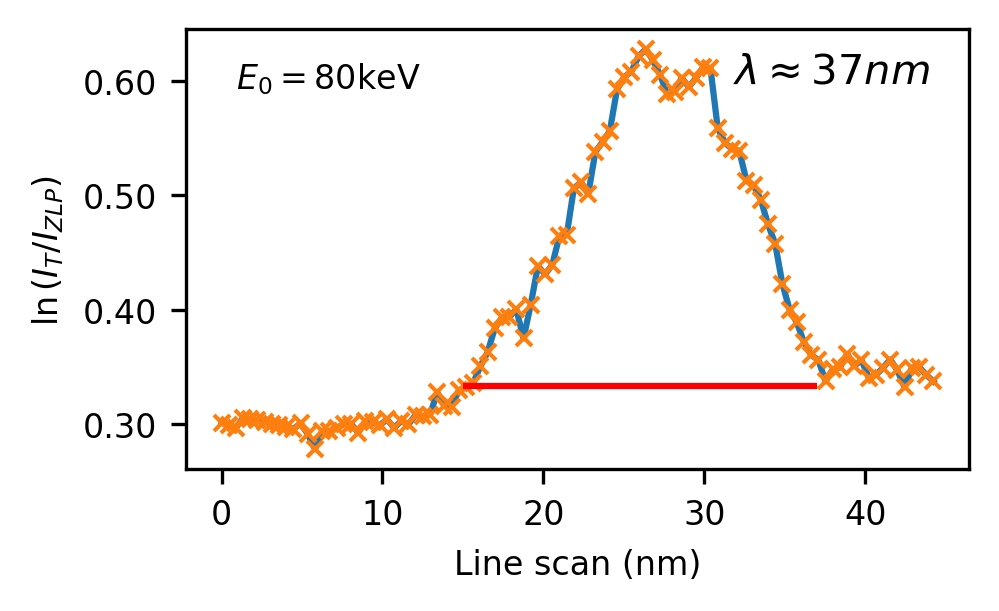

np radius 11.0 lambdaright 37.87917216604183 lambdaleft 36.8744799817977 bgleft 0.33747939380606085 bgright 0.3295671561150256


In [22]:
calculate_lambda("expdata/80keV_corrected.zspy",15,37,80)

### Figure SOI-6 middle

Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	18
std:	0.0572

min:	17.9
Q1:	18
median:	18
Q3:	18
max:	18.1
[########################################] | 100% Completed | 101.72 ms
[########################################] | 100% Completed | 101.77 ms
[########################################] | 100% Completed | 101.66 ms


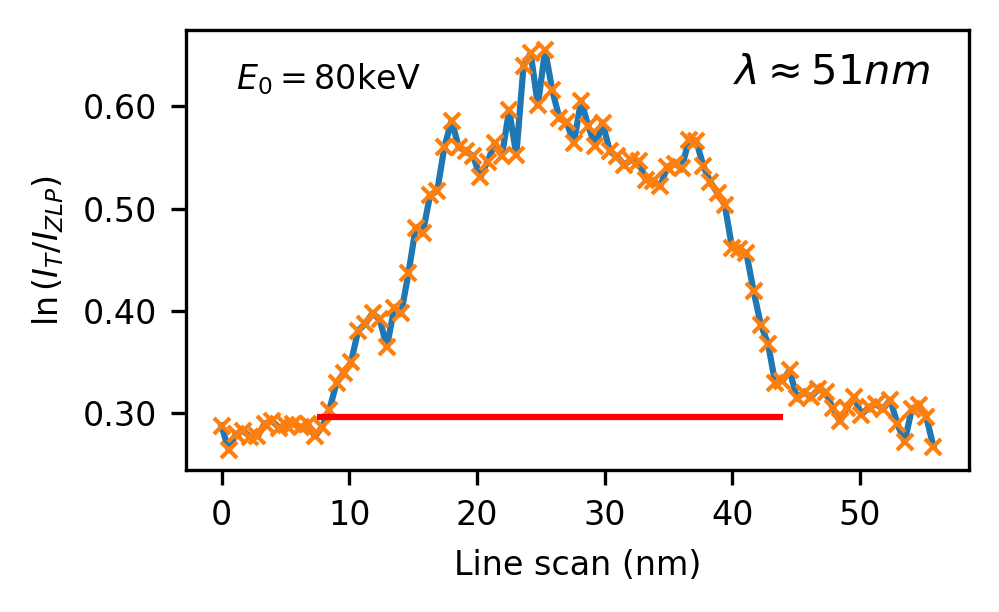

np radius 18.25 lambdaright 53.719833405996255 lambdaleft 48.3287921456285 bgleft 0.31519199086301253 bgright 0.27729585522663763


In [23]:
calculate_lambda('expdata/16.25.36 Drift corrected spectrum profile_1.ser_80keV_corrected.zspy',7.5,44,80)

### Figure SOI-6 bottom

Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	18.9
std:	0.0581

min:	18.8
Q1:	18.9
median:	18.9
Q3:	18.9
max:	19
[########################################] | 100% Completed | 102.00 ms
[########################################] | 100% Completed | 101.69 ms
[########################################] | 100% Completed | 101.59 ms


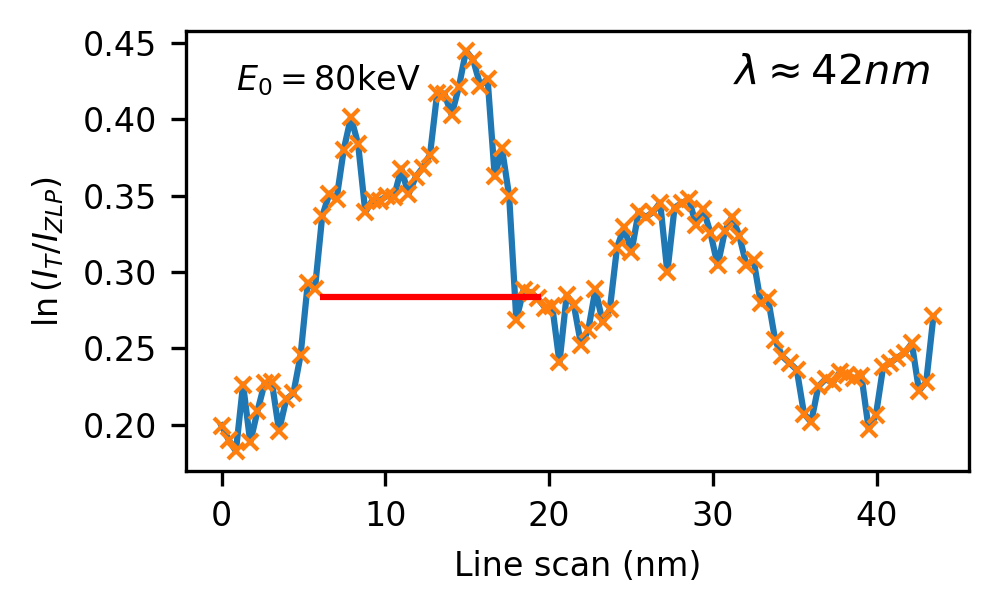

np radius 6.75 lambdaright 40.37372290216676 lambdaleft 43.39975713123179 bgleft 0.2775319442556239 bgright 0.28918907082466533


In [24]:
calculate_lambda("expdata/15.22.50 Drift corrected spectrum profile_1.ser_80keV_corrected.zspy",6.0,19.5,80)

## Lambda for 300keV

### Figure 7a

Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	1.18
std:	0.0792

min:	1
Q1:	1.2
median:	1.2
Q3:	1.2
max:	1.4
[########################################] | 100% Completed | 101.85 ms
[########################################] | 100% Completed | 101.90 ms
[########################################] | 100% Completed | 101.71 ms


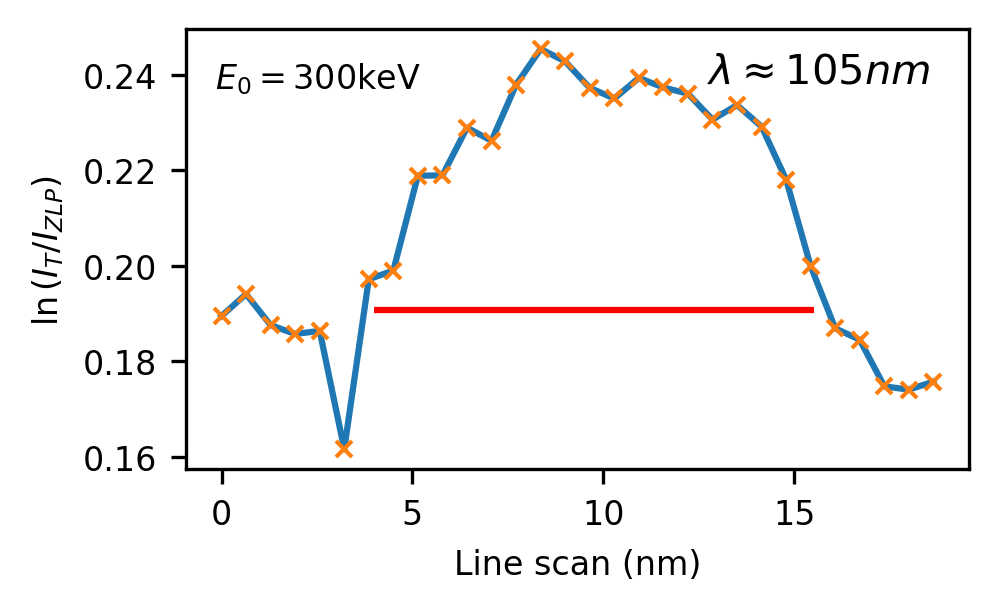

np radius 5.75 lambdaright 94.47035478198742 lambdaleft 119.30134190614483 bgleft 0.18450810554728264 bgright 0.1971764818262708


In [25]:
calculate_lambda("expdata/16.35.04 Spectrum profile_1.ser",4,15.5,300)

### Figure SOI-6 top

Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	1.26
std:	0.0917

min:	1.2
Q1:	1.2
median:	1.2
Q3:	1.4
max:	1.4
[########################################] | 100% Completed | 102.84 ms
[########################################] | 100% Completed | 102.47 ms
[########################################] | 100% Completed | 101.69 ms


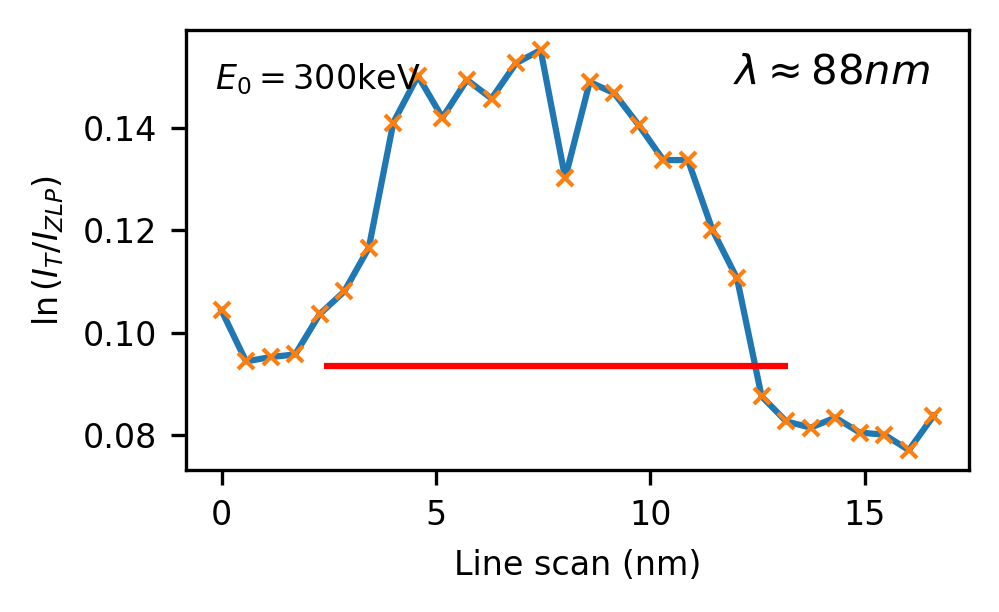

np radius 5.3999999999999995 lambdaright 75.3750536476133 lambdaleft 104.89822089505323 bgleft 0.08347741222799708 bgright 0.10364068149484483


In [26]:
calculate_lambda("expdata/16.31.53 Spectrum profile_1.ser",2.4,13.2,300)

## energy abstortion in Au@hbn at 80keV

### Figure 7d

Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	18
std:	0.0519

min:	17.9
Q1:	18
median:	18
Q3:	18
max:	18.1
[########################################] | 100% Completed | 102.81 ms
[########################################] | 100% Completed | 101.95 ms
[########################################] | 100% Completed | 102.12 ms


(1.0008266709599107, 18.59349956058108)

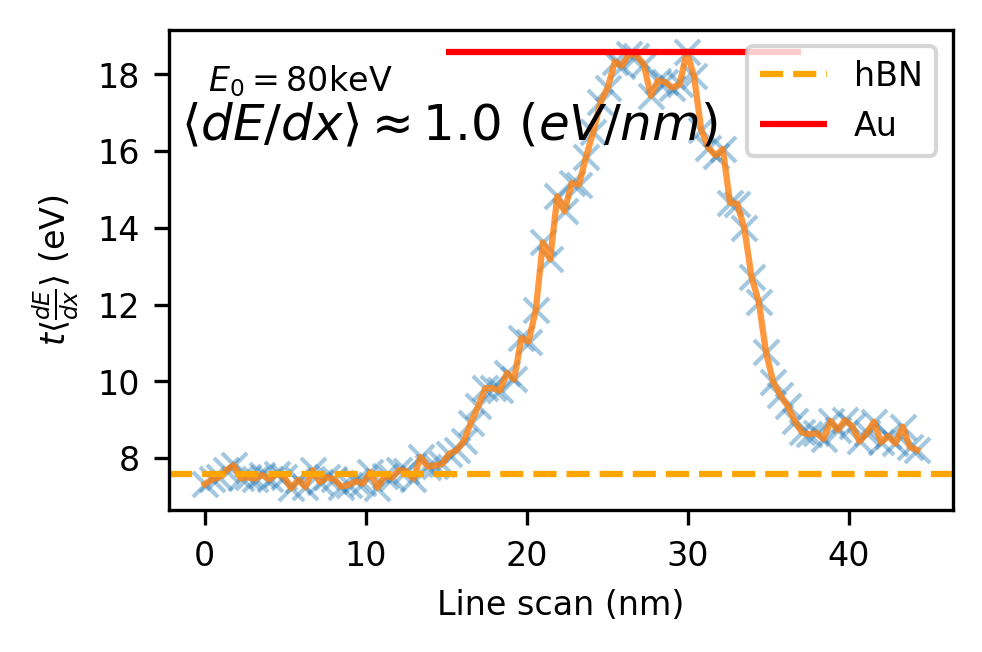

In [27]:
calculate_enl_from_ser_file3("expdata/80keV_corrected.zspy",15,37,80)

## energy abstortion in Au@hbn at 300keV

### Figure 7c

Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	1.18
std:	0.0792

min:	1
Q1:	1.2
median:	1.2
Q3:	1.2
max:	1.4
[########################################] | 100% Completed | 102.44 ms
[########################################] | 100% Completed | 101.71 ms
[########################################] | 100% Completed | 102.17 ms


(0.3631708660009682, 7.555591933021001)

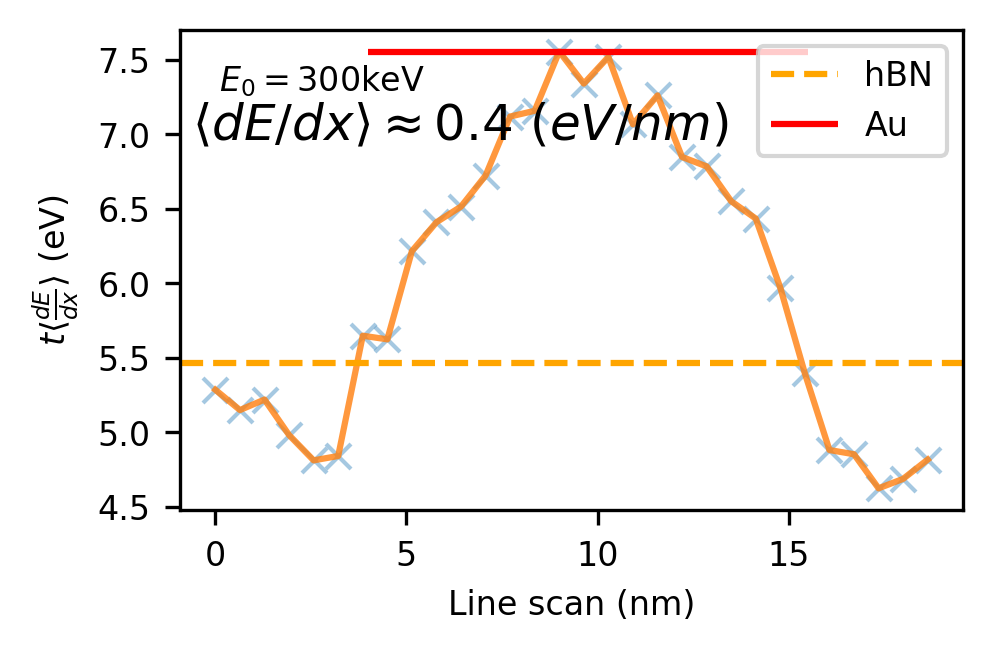

In [28]:
calculate_enl_from_ser_file3("expdata/16.35.04 Spectrum profile_1.ser",4,15.5,300)

### Figure 7f

Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	1.53e-06
std:	0

min:	1.53e-06
Q1:	1.53e-06
median:	1.53e-06
Q3:	1.53e-06
max:	1.53e-06
10.8


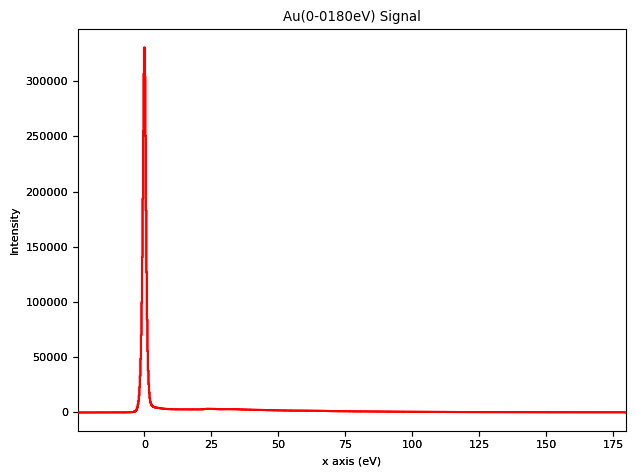

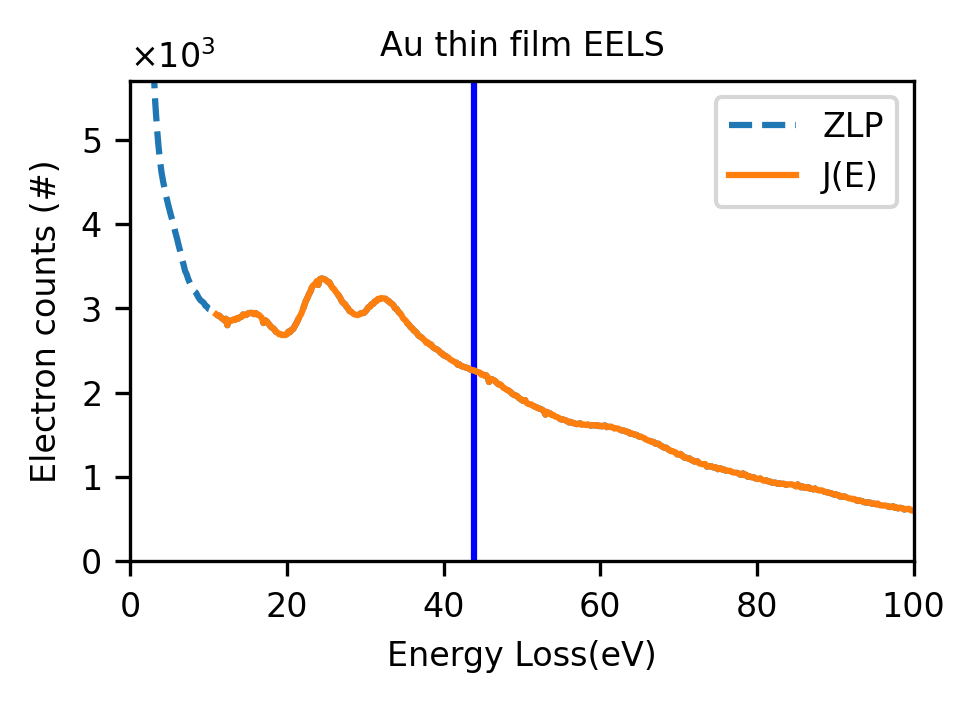

43.839872263092964 [10.8]


In [29]:
## EELS Au thin film
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

aueels=hs.load('expdata/Au(0-0180eV).dm3')
aueels.set_signal_type("EELS")
aueels.align_zero_loss_peak()
signal = aueels.data
th= aueels.estimate_elastic_scattering_threshold().data[0]
print(th)
aueels.plot()
ax = plt.gca() 
line = ax.lines[0] # get the first line, there might be more
x=line.get_xdata()
y=line.get_ydata()
ths=th
expected_value(x[(x>ths)&(x<110)],y[(x>ths)&(x<110)])
ths=aueels.estimate_elastic_scattering_threshold().data
expv=expected_value(x[(x>ths)&(x<100)],y[(x>ths)&(x<100)])
plt.figure(figsize=(3.37, 2.08),dpi=300)
plt.axvline(x = expv, color = 'b',)
plt.title(r'Au thin film EELS',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Energy Loss(eV)',fontsize=8)
plt.ylabel(r'Electron counts (#)',fontsize=8)
plt.plot(x,signal,'--',label='ZLP')
plt.plot(x[(x>ths)&(x<100)],y[(x>ths)&(x<100)],label='J(E)')
plt.ylim(ymin=0,ymax=1.7*max(y[(x>ths)&(x<100)]))
plt.xlim(xmin=0,xmax=100)
# plt.plot(x[(x>ths-5)&(x<100)],(signal-y)[(x>ths-5)&(x<100)],'--',label='ZLP')
plt.savefig('Aueels.png')
# plt.text(0.93,0.63,r"$\langle E \rangle \approx {:.0f}$eV".format(expv), fontsize=18, ha='right', va='top', transform=plt.gca().transAxes)
plt.legend(fontsize='8')
formatter = mticker.ScalarFormatter(useMathText=True, useOffset=False)
formatter.set_powerlimits((1, 3))  # Adjust the power limits as needed
plt.gca().yaxis.set_major_formatter(formatter)

plt.savefig('Authinfilmenergyloss.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
print(expv,ths)

## Figure SOI-7: comparing 80keV vs 300keV, showing the ZLP and low loss spectra

(100, 2048)
Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	18
std:	0.0519

min:	17.9
Q1:	18
median:	18
Q3:	18
max:	18.1
[########################################] | 100% Completed | 101.77 ms
[########################################] | 100% Completed | 102.15 ms
[########################################] | 100% Completed | 102.30 ms
(30, 2048)
Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	1.26
std:	0.0917

min:	1.2
Q1:	1.2
median:	1.2
Q3:	1.4
max:	1.4
[########################################] | 100% Completed | 102.16 ms
[########################################] | 100% Completed | 101.65 ms
[########################################] | 100% Completed | 101.76 ms


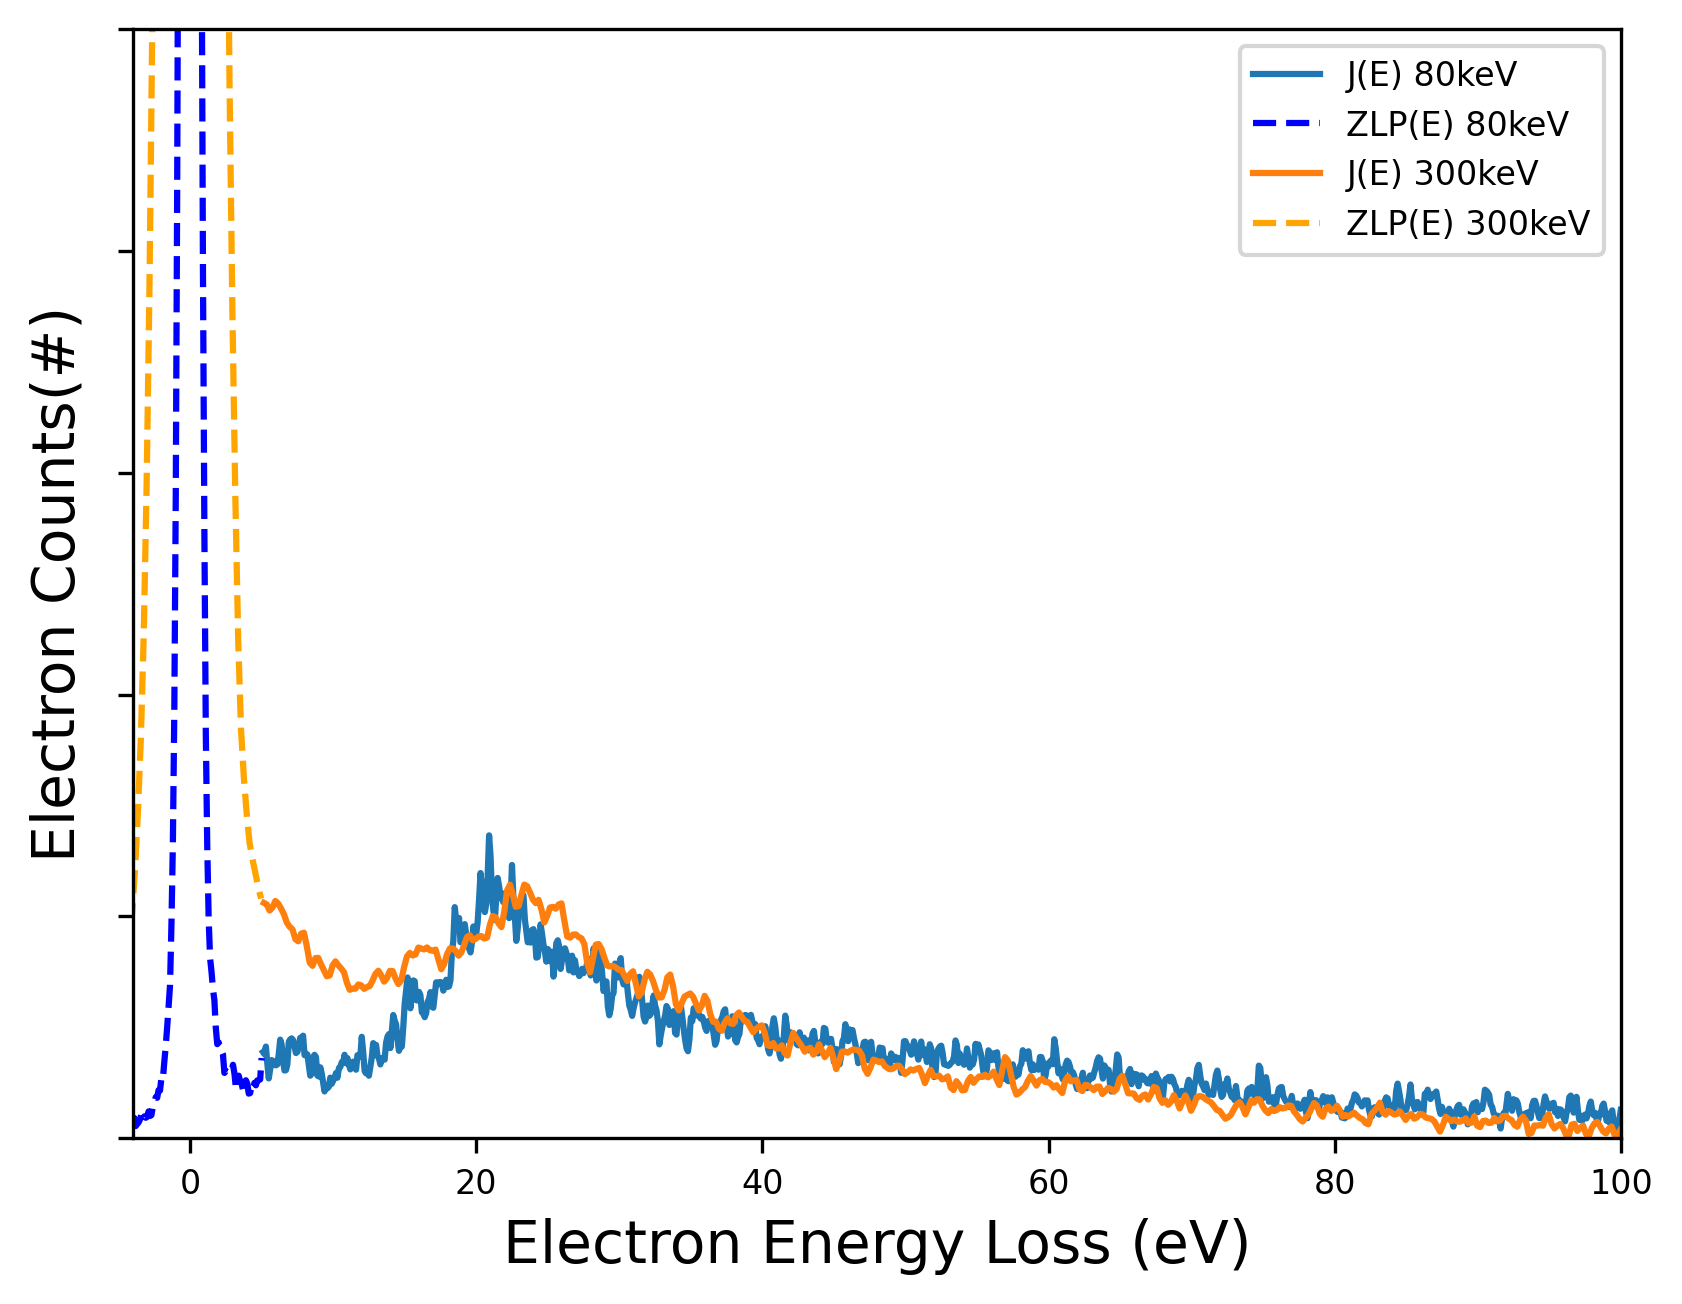

In [30]:
ser_file="expdata/80keV_corrected.zspy"
s1= hs.load(ser_file)
s1.set_signal_type("EELS")
szlp1=s1.data
print(np.shape(szlp1))

tote1=np.sum(szlp1)*0.5
s1.align_zero_loss_peak()
x2=s1.axes_manager[1].axis
s1.axes_manager[1].axis=x2
xaxis1=x2
szlp1=s1.data


ser_file2="expdata/16.31.53 Spectrum profile_1.ser"
s2 = hs.load(ser_file2)
s2.set_signal_type("EELS")
szlp2=s2.data
tote2=np.sum(szlp2)*1.5
print(np.shape(szlp2))

s2.align_zero_loss_peak()
szlp2=s2.data
xaxis2=s2.axes_manager[1].axis


plt.gcf().set_dpi(300)
subset = xaxis1[(xaxis1 >= -5) & (xaxis1 <= 5)]
plt.plot(xaxis1[xaxis1 > 5],szlp1[60][xaxis1 > 5]/tote1,label='J(E) 80keV')
plt.plot(subset,szlp1[60][(xaxis1 >= -5) & (xaxis1 <= 5)]/tote1,'--',color='blue',label='ZLP(E) 80keV')
plt.plot(xaxis2[xaxis2 > 5],szlp2[14][xaxis2 > 5]/tote2,label='J(E) 300keV')
plt.plot(xaxis2[(xaxis2 >= -5) & (xaxis2 <= 5)],szlp2[14][(xaxis2 >= -5) & (xaxis2 <= 5)]/tote2,'--',color='orange',label='ZLP(E) 300keV')
plt.legend()
plt.xlim(xmin=-4,xmax=100)
plt.ylim(ymin=0,ymax=.00005)
plt.xlabel('Electron Energy Loss (eV)', fontsize=14)
plt.ylabel(r'Electron Counts(#)', fontsize=14)
plt.gca().set_yticklabels([])
plt.savefig(f'whatiszlpwhatisje.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
    
    

